<h1 align="center">Credit Score Prediction</h1>
<h3>Features</h3>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.feature_selection import SelectKBest, RFE, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, label_binarize
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    roc_curve,
    auc,
    confusion_matrix
)
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier, StackingClassifier
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


In [3]:
data = pd.read_csv("train.csv")
data = data.head(25000)
data.shape

(25000, 28)

In [4]:
dict = {
    "January" : 1,
    "February" : 2,
    "March" : 3,
    "April" : 4,
    "May" : 5,
    "June" : 6,
    "July" : 7,
    "August" : 8,
}

data["Month"] = data["Month"].map(dict)
data.head()

ID Customer_ID  Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40      1  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40      2  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40      3  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40      4  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40      5  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [5]:
data.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        2492
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       3750
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                2840
Delay_from_due_date            0
Num_of_Delayed_Payment      1769
Changed_Credit_Limit           0
Num_Credit_Inquiries         493
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          2310
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     1099
Payment_Behaviour              0
Monthly_Balance              312
Credit_Score                   0
dtype: int64

In [6]:
data.describe()

Month  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  25000.000000           21250.000000        25000.00000   
mean       4.500000            4232.601588           16.71532   
std        2.291334            3193.265223          114.92854   
min        1.000000             333.596667            0.00000   
25%        2.750000            1654.615000            3.00000   
50%        4.500000            3124.596888            6.00000   
75%        6.250000            6034.680000            8.00000   
max        8.000000           14866.446667         1798.00000   

       Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
count     25000.000000   25000.000000         25000.000000   
mean         23.294240      67.908400            21.154680   
std         131.690911     445.411394            14.711657   
min           0.000000       1.000000            -5.000000   
25%           4.000000       7.000000            10.000000   
50%           6.000000      13.000000            18.000000   
75%           7.000000      20.000000            28.000000   
max        1498.000000    5788.000000            67.000000   

       Num_Credit_Inquiries  Credit_Utilization_Ratio  Total_EMI_per_month  
count          24507.000000              25000.000000         25000.000000  
mean              25.912188                 32.288799          1425.303897  
std              182.543043                  5.139636          8423.712668  
min                0.000000                 20.000000             0.000000  
25%                3.000000                 28.015312            30.305498  
50%                6.000000                 32.310264            68.785100  
75%                9.000000                 36.529522           165.818860  
max             2594.000000                 50.000000         82256.000000

In [7]:
columns_with_underscore = [col for col in data.columns if any("_" in str(value) for value in data[col])]
columns_with_underscore

['Customer_ID',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

<h3>Data Cleaning</h3>

In [8]:
def remove_underscore(col):
    data[col] = data[col].apply(lambda x: str(x).replace("_", "") if str(x) else x)
    data[col] = pd.to_numeric(data[col], errors="coerce")


data["Num_of_Loan"].fillna("-100")
data["Num_of_Delayed_Payment"].fillna("-1")



remove_underscore("Age")
remove_underscore("Num_of_Delayed_Payment")
remove_underscore("Changed_Credit_Limit")
remove_underscore("Outstanding_Debt")
remove_underscore("Amount_invested_monthly")
remove_underscore("Monthly_Balance")

In [9]:
dict = {
    'High_spent_Small_value_payments' : 0,
       'Low_spent_Large_value_payments' : 1,
       'Low_spent_Medium_value_payments' : 2,
       'Low_spent_Small_value_payments' : 3,
       'High_spent_Medium_value_payments' : 4, 
       '!@9#%8' : np.nan,
       'High_spent_Large_value_payments': 5}

data['Payment_Behaviour'] = data['Payment_Behaviour'].map(dict)

<h3>Finding mean, mode and filling the missing values for a person</h3>

In [10]:
def find_mean(i, col):
    mean = 0
    j = i
    while j != i + 8:
        value = data.at[j, col]
        if pd.notna(value) and (np.issubdtype(type(value), np.floating)or np.issubdtype(type(value), np.integer)):
            mean += float(value)
        j += 1
    return mean / 8


def find_mode(i, col):
    mode = {}
    j = i

    while j != i + 8:
        value = data.at[j, col]
        if pd.notna(value) and (np.issubdtype(type(value), np.floating) or (np.issubdtype(type(value), np.integer) and value > 0)):
            if data.at[j, col] in mode:
                mode[value] += 1
            else:
                mode[value] = 1
        j += 1

    return max(mode, key=mode.get)

def date_to_int(value):
    year = []
    month = []
    i = 0
    flag = 0

    for char in value:
        if char.isnumeric() and not flag:
            year.append(char)
        else:
            flag = 1
        
        if char.isnumeric() and flag:
            month.append(char)

    result = result = int(''.join(map(str, year))) * 12 +  int(''.join(map(str, month)))

    return result


In [11]:
def fill_missing(i,col,condition):
     index = []
     j = i
     valid = ''
     while (j != i + 8):
         if condition(j,col):
             index.append(j)
         else:
             valid = data.at[j,col]
         j+=1
     for k in index:
         data.at[k,col] = valid

def fill_with_mean(i,col,condition):
    mean = find_mean(i,col)
    j = i
    while (j != i + 8):
         if condition(j,col):
            data.at[j,col] = mean
         j+=1

def fill_with_mode(i,col,condition):
        mode = find_mode(i,col)
        j = i
        while (j != i + 8):
             if condition(j,col):
                data.at[j,col] = mode
             j+=1

def transform_dates(i):
    j = i
    while(j != i + 8):
        data.at[j, "Credit_History_Age"] = date_to_int(data.at[j, "Credit_History_Age"])
        j += 1

In [12]:
def find_missing():
    for i, _ in data.iterrows():
        if i % 8 == 0:
            fill_missing(i, "Name", lambda j, col: pd.isna(data.at[j, col]))
            fill_missing(i, "Occupation", lambda j, col: "__" in data.at[j, col])
            fill_missing(i, "Credit_Mix", lambda j, col: "_" in data.at[j, col])
            fill_missing(i, "Annual_Income", lambda j, col: "_" in data.at[j, col])
            fill_missing(i, "Type_of_Loan", lambda j, col: pd.isna(data.at[j, col]))
            fill_missing(i, "Num_of_Loan", lambda j, col: "-" in data.at[j, col])
            fill_missing(i, "SSN", lambda j, col: "#" in data.at[j, col])
            fill_missing(i, "Credit_History_Age", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Changed_Credit_Limit", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Monthly_Inhand_Salary", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Delay_from_due_date", lambda j, col: data.at[j, col] < 0)
            fill_with_mean(i, "Num_of_Delayed_Payment", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Num_of_Delayed_Payment", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Amount_invested_monthly", lambda j, col: data.at[j, col] == 10_000 or pd.isna(data.at[j,col]))
            fill_with_mean(i, "Monthly_Balance", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i,"Num_Credit_Inquiries",lambda j, col: pd.isna(data.at[j, col]),)
            fill_with_mean(i, "Payment_Behaviour", lambda  j, col: pd.isna(data.at[j, col]))
            fill_with_mode(i, "Age", lambda j, col: "-" in str(data.at[j, col]))
            transform_dates(i)


find_missing()

In [13]:
remove_underscore("Num_of_Loan")
remove_underscore("Annual_Income")

In [14]:
columns_with_underscore = [col for col in data.columns if any("_" in str(value) for value in data[col])]
columns_with_underscore

['Customer_ID', 'Occupation']

In [15]:
label_encoder = LabelEncoder()

data["Occupation"] = label_encoder.fit_transform(data["Occupation"])
data["Credit_Mix"] = label_encoder.fit_transform(data["Credit_Mix"])
data["Payment_of_Min_Amount"] = label_encoder.fit_transform(data["Payment_of_Min_Amount"])
data["Credit_Score"] = label_encoder.fit_transform(data["Credit_Score"])


data.drop("ID", axis=1, inplace=True)
data.drop("Name", axis=1, inplace=True)
data.drop("Customer_ID", axis=1, inplace=True)
data.drop("SSN", axis=1, inplace=True)
data.drop("Type_of_Loan", axis=1, inplace=True)

In [16]:
data.shape

(25000, 23)

In [17]:
data.head()

Month  Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      1   23          12       19114.12            1824.843333   
1      2   23          12       19114.12             912.421667   
2      3   23          12       19114.12             912.421667   
3      4   23          12       19114.12             912.421667   
4      5   23          12       19114.12            1824.843333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

   Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                 3.00                     7.0              11.27000   
1                 3.75                     4.5              11.27000   
2                 3.00                     7.0               8.98625   
3                 5.00                     4.0               6.27000   
4                 6.00                     4.5              11.27000   

   Num_Credit_Inquiries  Credit_Mix  Outstanding_Debt  \
0                   4.0           1            809.98   
1                   4.0           1            809.98   
2                   4.0           1            809.98   
3                   4.0           1            809.98   
4                   4.0           1            809.98   

   Credit_Utilization_Ratio Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620                265                      1   
1                 31.944960                271                      1   
2                 28.609352                267                      1   
3                 31.377862                268                      1   
4                 24.797347                269                      1   

   Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0            49.574949                80.415295                0.0   
1            49.574949               118.280222                1.0   
2            49.574949                81.699521                2.0   
3            49.574949               199.458074                3.0   
4            49.574949                41.420153                4.0   

   Monthly_Balance  Credit_Score  
0       312.494089             0  
1       284.629162             0  
2       331.209863             0  
3       223.451310             0  
4       341.489231             0

In [18]:
data.describe()

Month           Age    Occupation  Annual_Income  \
count  25000.000000  25000.000000  25000.000000   2.500000e+04   
mean       4.500000    115.657800      7.043200   1.711670e+05   
std        2.291334    685.428173      4.289577   1.377785e+06   
min        1.000000     14.000000      0.000000   7.006520e+03   
25%        2.750000     25.000000      3.000000   1.962318e+04   
50%        4.500000     33.000000      7.000000   3.798312e+04   
75%        6.250000     42.000000     11.000000   7.373992e+04   
max        8.000000   8674.000000     14.000000   2.418881e+07   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           25000.000000        25000.00000     25000.000000   
mean             4062.870228           16.71532        23.294240   
std              3115.425702          114.92854       131.690911   
min               250.197500            0.00000         0.000000   
25%              1581.792500            3.00000         4.000000   
50%              2988.795833            6.00000         6.000000   
75%              5845.048333            8.00000         7.000000   
max             14866.446667         1798.00000      1498.000000   

       Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count   25000.000000  25000.000000         25000.000000   
mean       67.908400      6.928760            21.172480   
std       445.411394     58.949881            14.685355   
min         1.000000      0.000000            -0.875000   
25%         7.000000      2.000000            10.000000   
50%        13.000000      3.000000            18.000000   
75%        20.000000      5.000000            28.000000   
max      5788.000000   1485.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            25000.000000          25000.000000          25000.000000   
mean                27.916490             10.285974             25.828785   
std                198.724623              6.762038            180.958185   
min                 -3.000000             -6.480000              0.000000   
25%                  9.000000              5.256562              3.000000   
50%                 14.000000              9.240000              5.812500   
75%                 18.000000             14.630000              9.000000   
max               4311.000000             36.970000           2594.000000   

         Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
count  25000.000000      25000.000000              25000.000000   
mean       1.205440       1414.025712                 32.288799   
std        0.804823       1171.171164                  5.139636   
min        0.000000          1.480000                 20.000000   
25%        1.000000        542.160000                 28.015312   
50%        1.000000       1145.900000                 32.310264   
75%        2.000000       1913.060000                 36.529522   
max        2.000000       4998.070000                 50.000000   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
count           25000.000000         25000.000000             25000.000000   
mean                1.407680          1425.303897               280.930233   
std                 0.693784          8423.712668               425.527325   
min                 0.000000             0.000000                 0.000000   
25%                 1.000000            30.305498                76.041106   
50%                 2.000000            68.785100               139.192837   
75%                 2.000000           165.818860               278.140274   
max                 2.000000         82256.000000              5029.942152   

       Payment_Behaviour  Monthly_Balance  Credit_Score  
count       25000.000000     2.500000e+04  25000.000000  
mean            2.694780    -1.333333e+22      1.352560  
std             1.515364     2.108185e+24      0.763652  
min             0.000000    -3.333333e+26

<Axes: ylabel='count'>

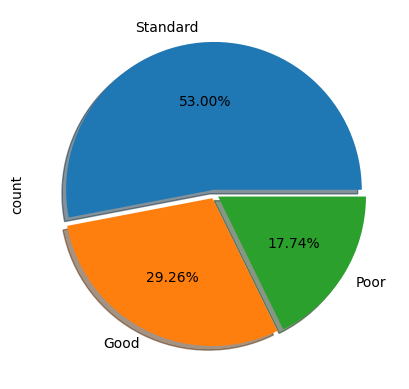

In [19]:
data["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Good","Poor"])

<h3>Correlation map without removing outliers</h3>

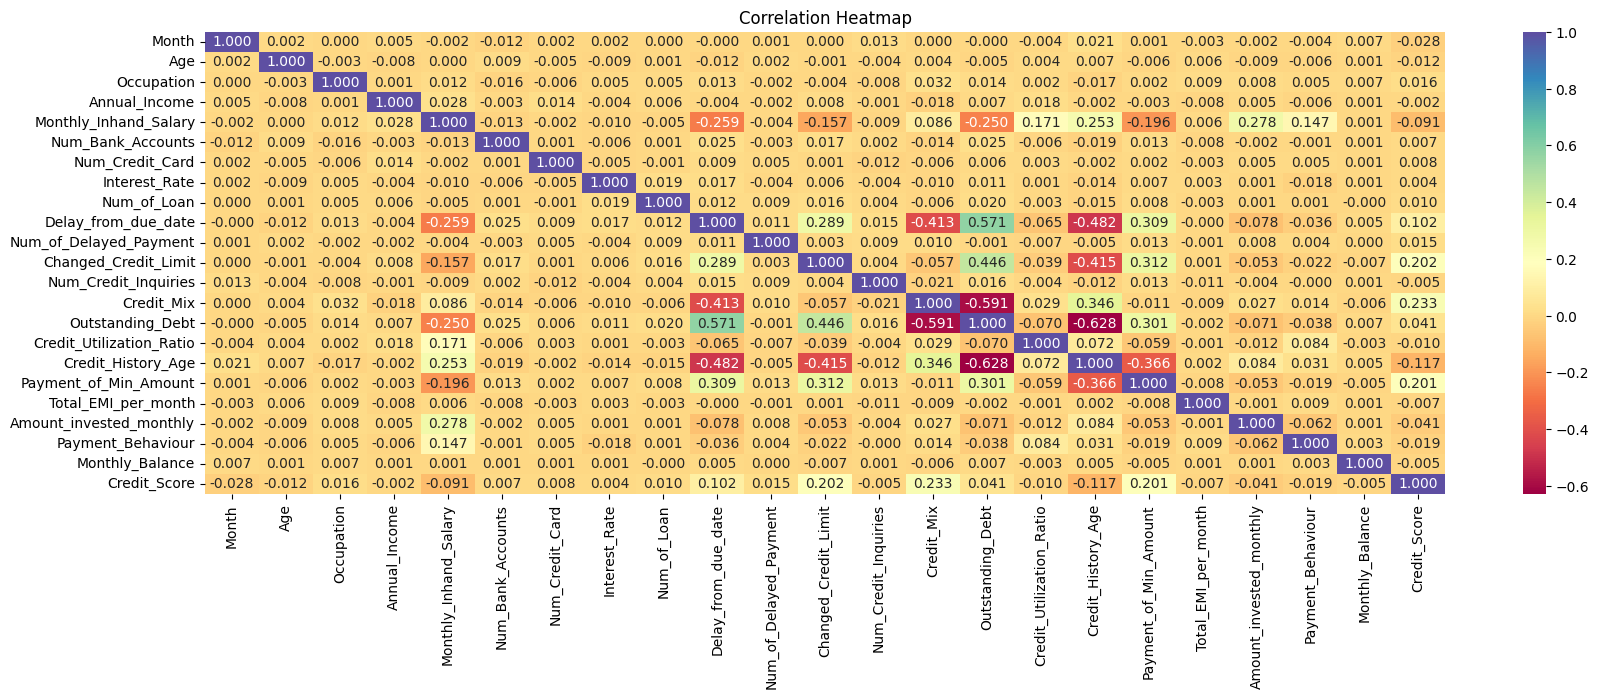

In [20]:
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 6))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")


show_heat_map(data)

<h3>Visualizing the Outliers</h3>

In [21]:
def show_outliers(data, col, edge):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    sns.stripplot(y=col, data=data[data[col] < edge], ax=axs[0])
    axs[0].set_title(f"{col} < {edge}")
    sns.stripplot(y=col, data=data[data[col] > edge], ax=axs[1])
    axs[1].set_title(f"{col} > {edge}")
    plt.tight_layout()
    plt.show()

In [22]:
def outlier_one(data):
    show_outliers(data,"Age", 56)
    show_outliers(data,"Num_Bank_Accounts", 11)
    show_outliers(data,"Num_Credit_Card", 15)
    show_outliers(data,"Interest_Rate", 35)

In [23]:
def outlier_two(data):
    show_outliers(data,"Num_of_Loan", 10)
    show_outliers(data,"Num_of_Delayed_Payment", 30)
    show_outliers(data,"Num_Credit_Inquiries",27)
    show_outliers(data,"Monthly_Balance",1e-10)

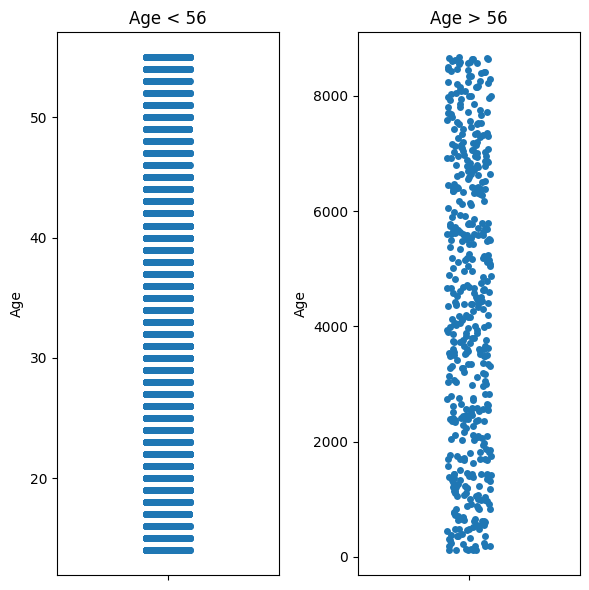

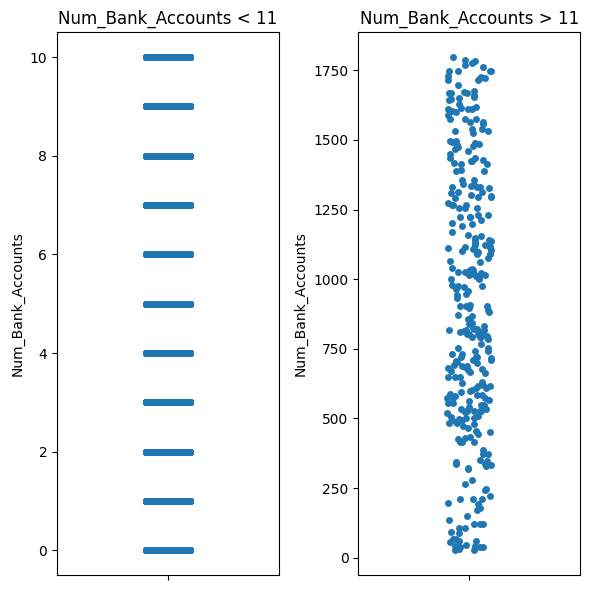

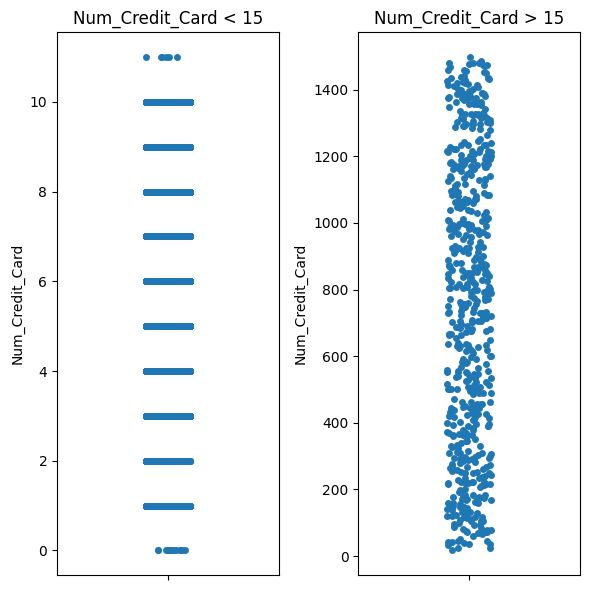

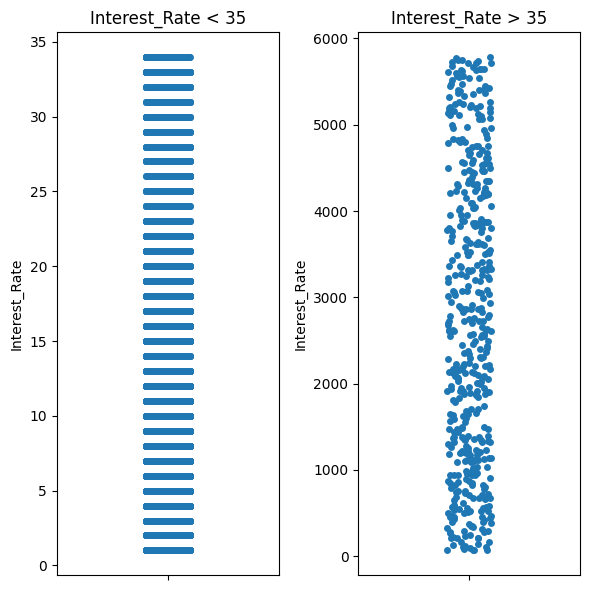

In [24]:
outlier_one(data)

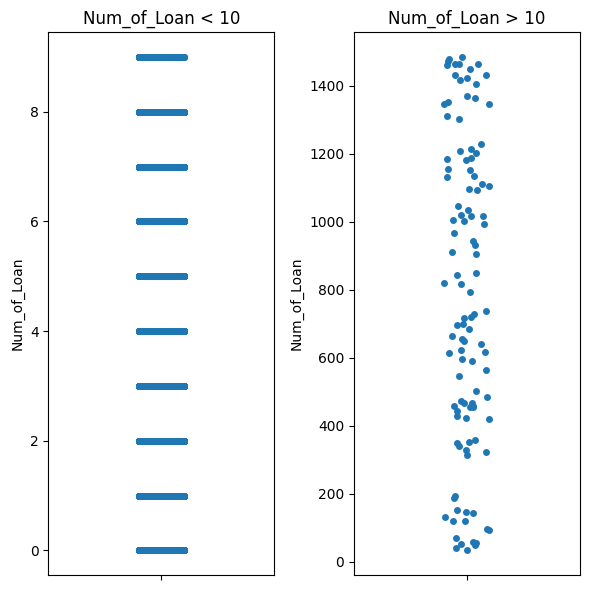

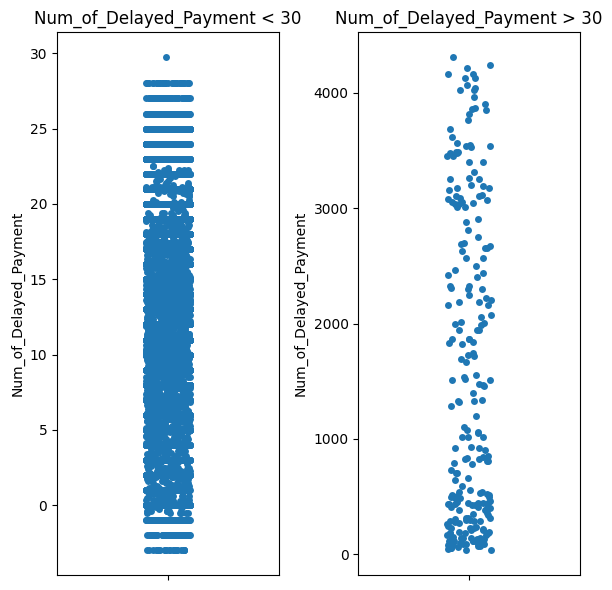

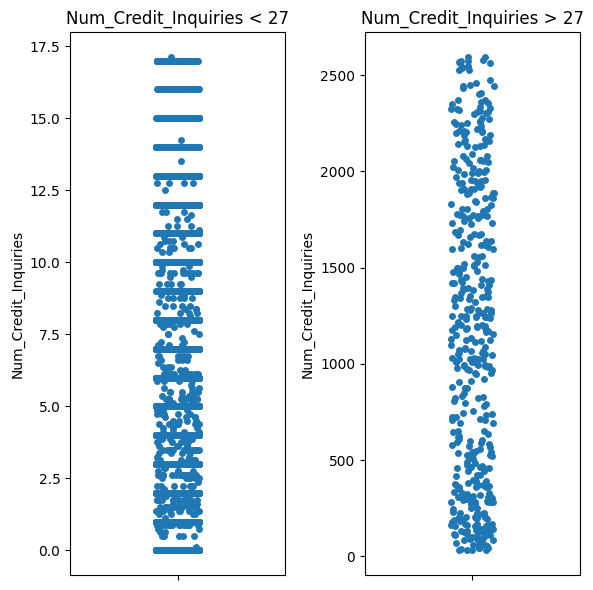

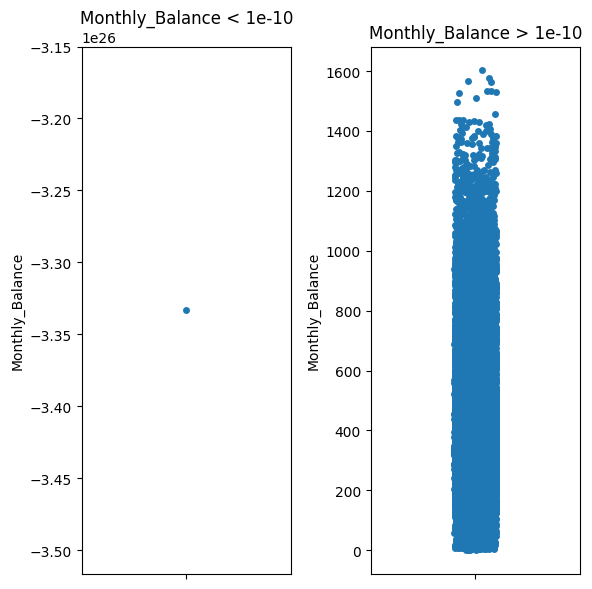

In [25]:
outlier_two(data)

<h3>Removing the outliers with IQR</h3>

In [26]:
new_data = data.copy()

cols = [
    "Age",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Num_of_Delayed_Payment",
    "Num_Credit_Inquiries",
    "Monthly_Balance",
]

for col in cols:
    q1, q3 = np.percentile(new_data[col], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers_mask = (new_data[col] < lower_bound) | (new_data[col] > upper_bound)
    new_data = new_data[~outliers_mask]

new_data.describe()

Month           Age    Occupation  Annual_Income  \
count  20715.000000  20715.000000  20715.000000   2.071500e+04   
mean       4.500941     33.112334      7.080425   1.669718e+05   
std        2.289710     10.637831      4.290267   1.396431e+06   
min        1.000000     14.000000      0.000000   7.006520e+03   
25%        2.000000     24.000000      3.000000   1.892472e+04   
50%        5.000000     33.000000      7.000000   3.486112e+04   
75%        6.000000     41.000000     11.000000   6.456052e+04   
max        8.000000     56.000000     14.000000   2.418881e+07   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           20715.000000       20715.000000     20715.000000   
mean             3575.196917           5.504272         5.627323   
std              2634.052652           2.587658         2.061113   
min               250.197500           0.000000         0.000000   
25%              1515.940000           4.000000         4.000000   
50%              2785.905833           6.000000         6.000000   
75%              5091.725000           8.000000         7.000000   
max             14866.446667          10.000000        11.000000   

       Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count   20715.000000  20715.000000         20715.000000   
mean       14.914168      3.745354            21.867934   
std         8.878237      2.429063            14.902176   
min         1.000000      0.000000            -0.875000   
25%         8.000000      2.000000            10.000000   
50%        14.000000      3.000000            19.000000   
75%        20.000000      6.000000            29.000000   
max        34.000000      9.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            20715.000000          20715.000000          20715.000000   
mean                13.536966             10.518221              6.007416   
std                  6.200024              6.851349              3.919700   
min                 -3.000000             -6.310000              0.000000   
25%                  9.000000              5.410000              3.000000   
50%                 14.000000              9.450000              6.000000   
75%                 18.000000             15.060000              9.000000   
max                 29.750000             36.970000             17.125000   

         Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
count  20715.000000      20715.000000              20715.000000   
mean       1.196379       1473.463677                 31.981109   
std        0.826306       1195.313733                  5.020107   
min        0.000000          1.480000                 20.000000   
25%        0.000000        577.850000                 27.753948   
50%        1.000000       1200.590000                 31.974281   
75%        2.000000       2037.640000                 36.232339   
max        2.000000       4998.070000                 43.726885   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
count           20715.000000         20715.000000             20715.000000   
mean                1.436785          1420.960713               276.958364   
std                 0.696547          8417.404502               424.217013   
min                 0.000000             0.000000                 0.000000   
25%                 1.000000            30.907553                72.765234   
50%                 2.000000            67.461632               133.288351   
75%                 2.000000           160.229859               271.588984   
max                 2.000000         82256.000000              5029.942152   

       Payment_Behaviour  Monthly_Balance  Credit_Score  
count       20715.000000     20715.000000  20715.000000  
mean            2.597834       355.740662      1.367463  
std             1.470849       141.482732      0.750297  
min             0.000000         0.453456

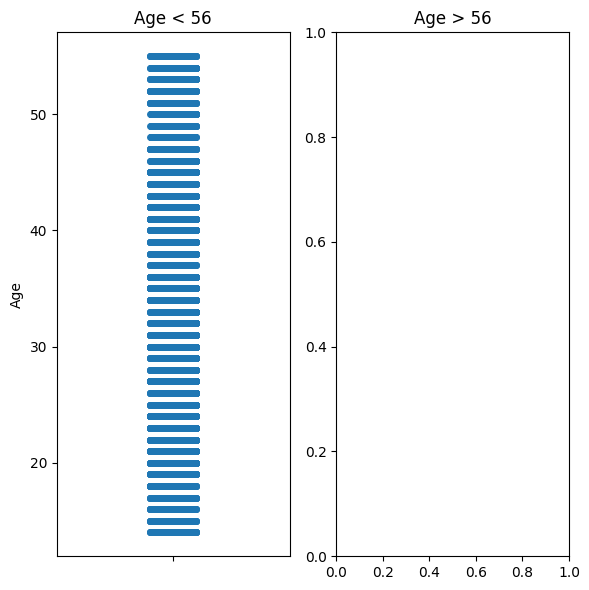

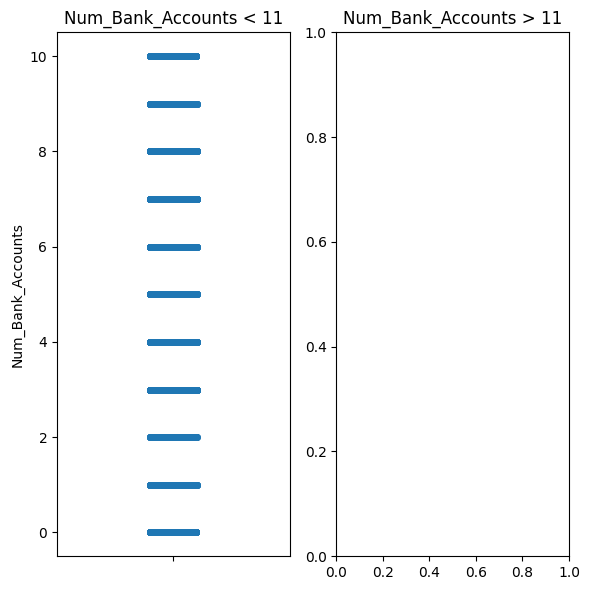

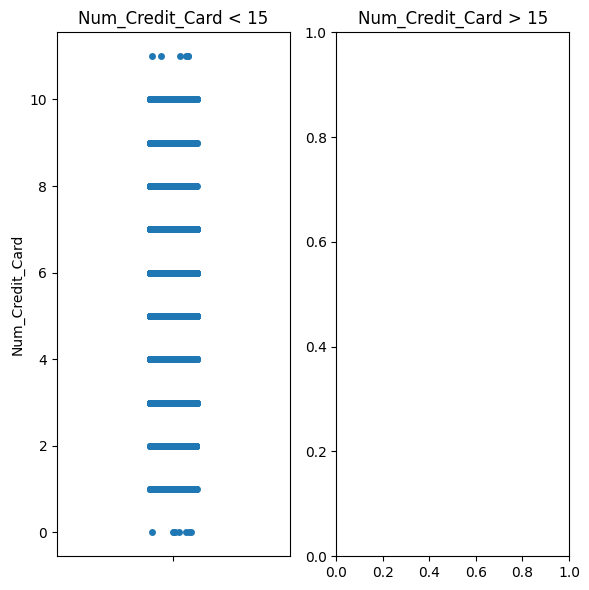

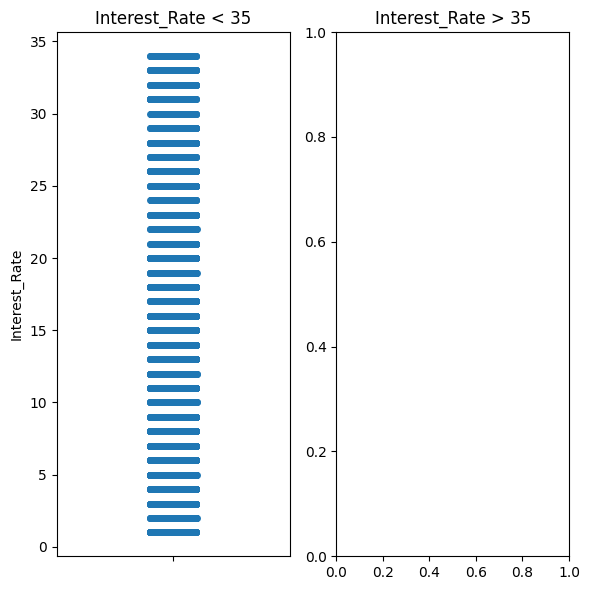

In [27]:
outlier_one(new_data)

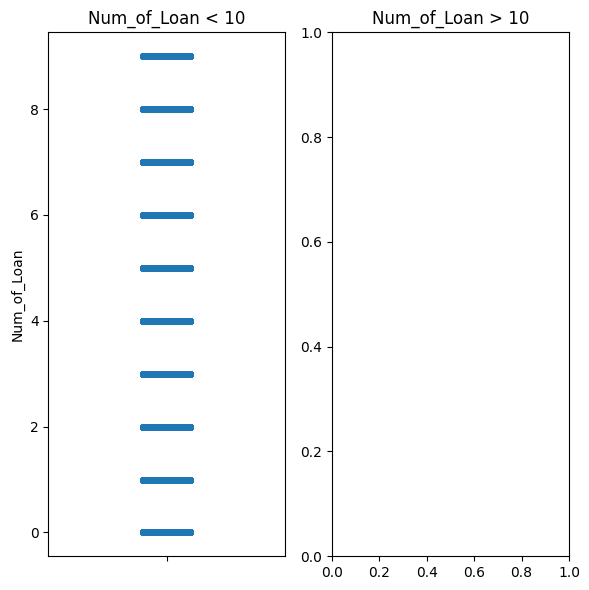

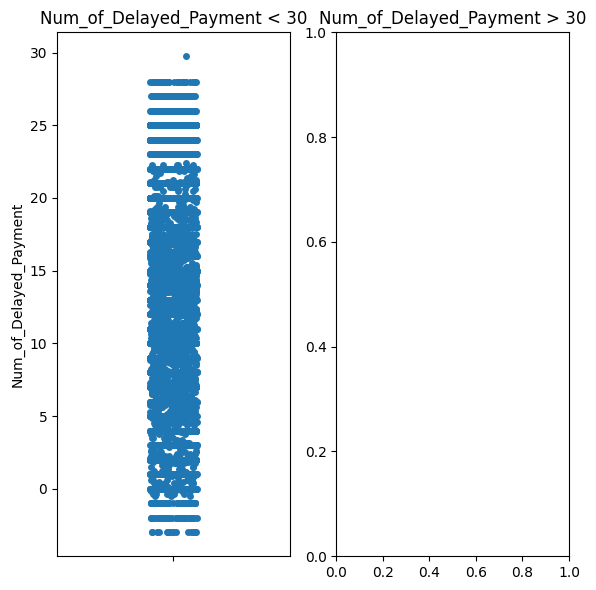

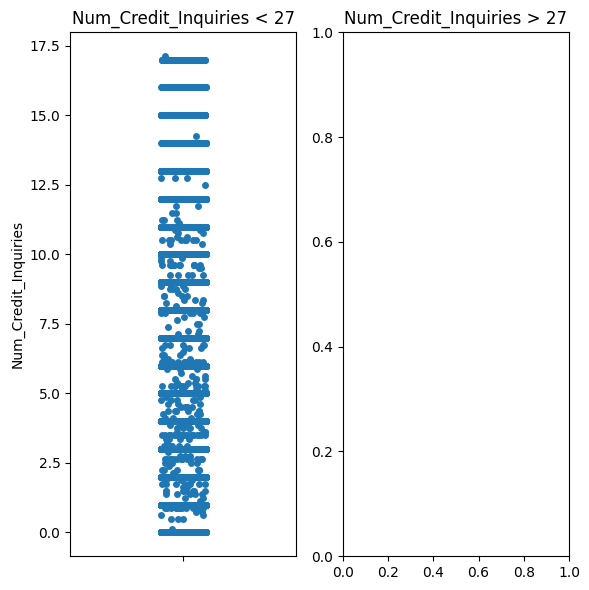

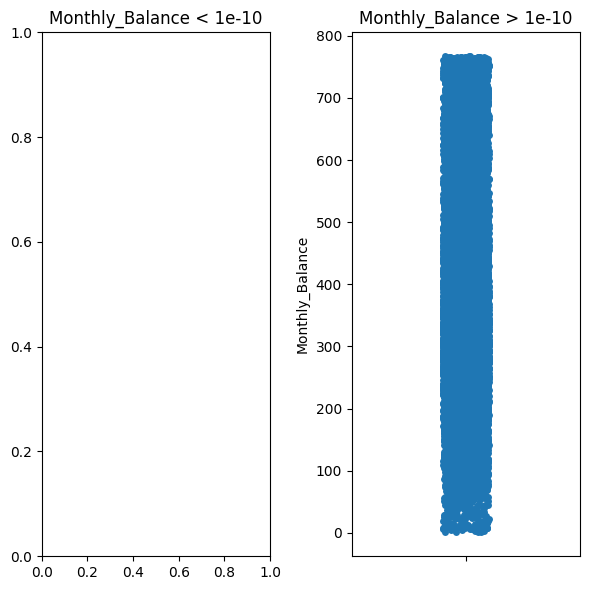

In [28]:
outlier_two(new_data)

<h4>Correlation map after removing outliers</h4>

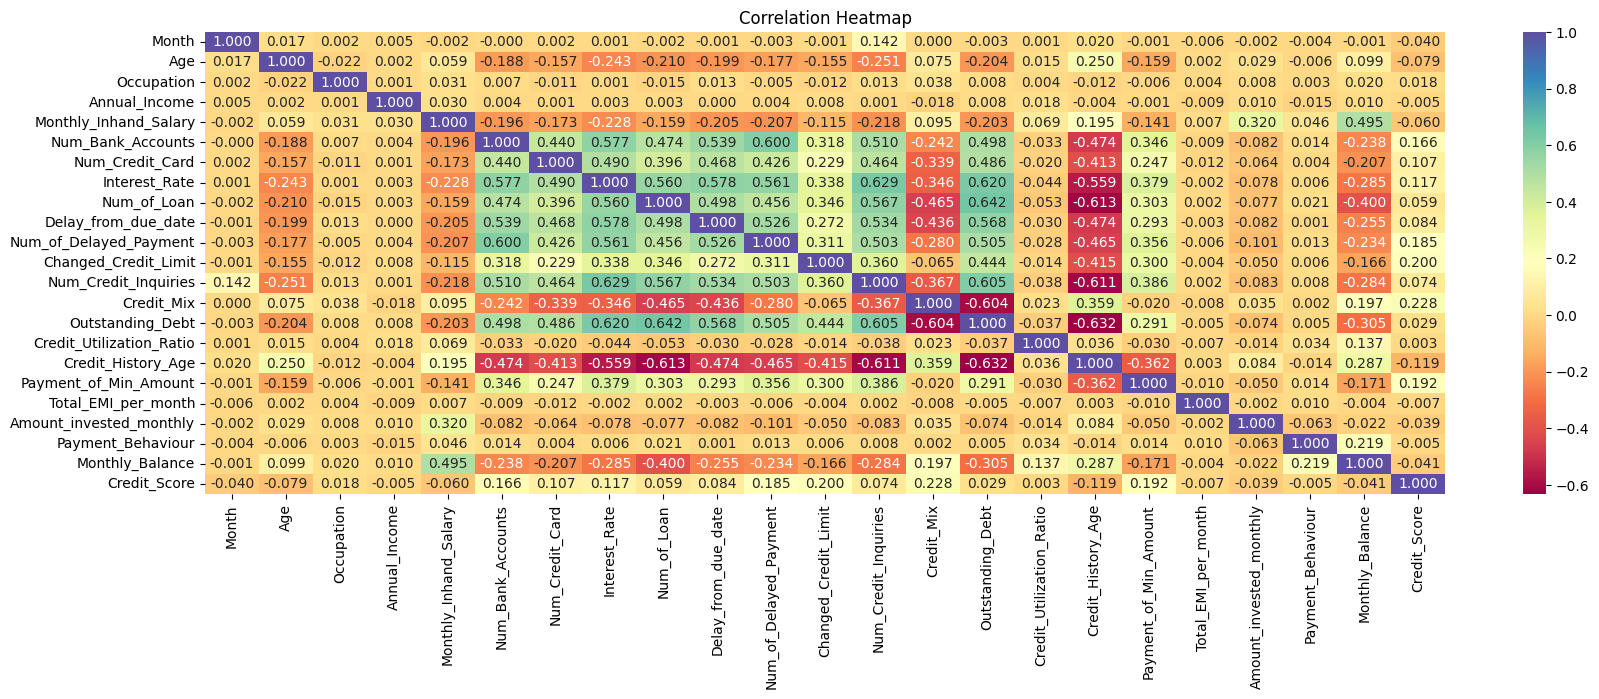

In [29]:
show_heat_map(new_data)

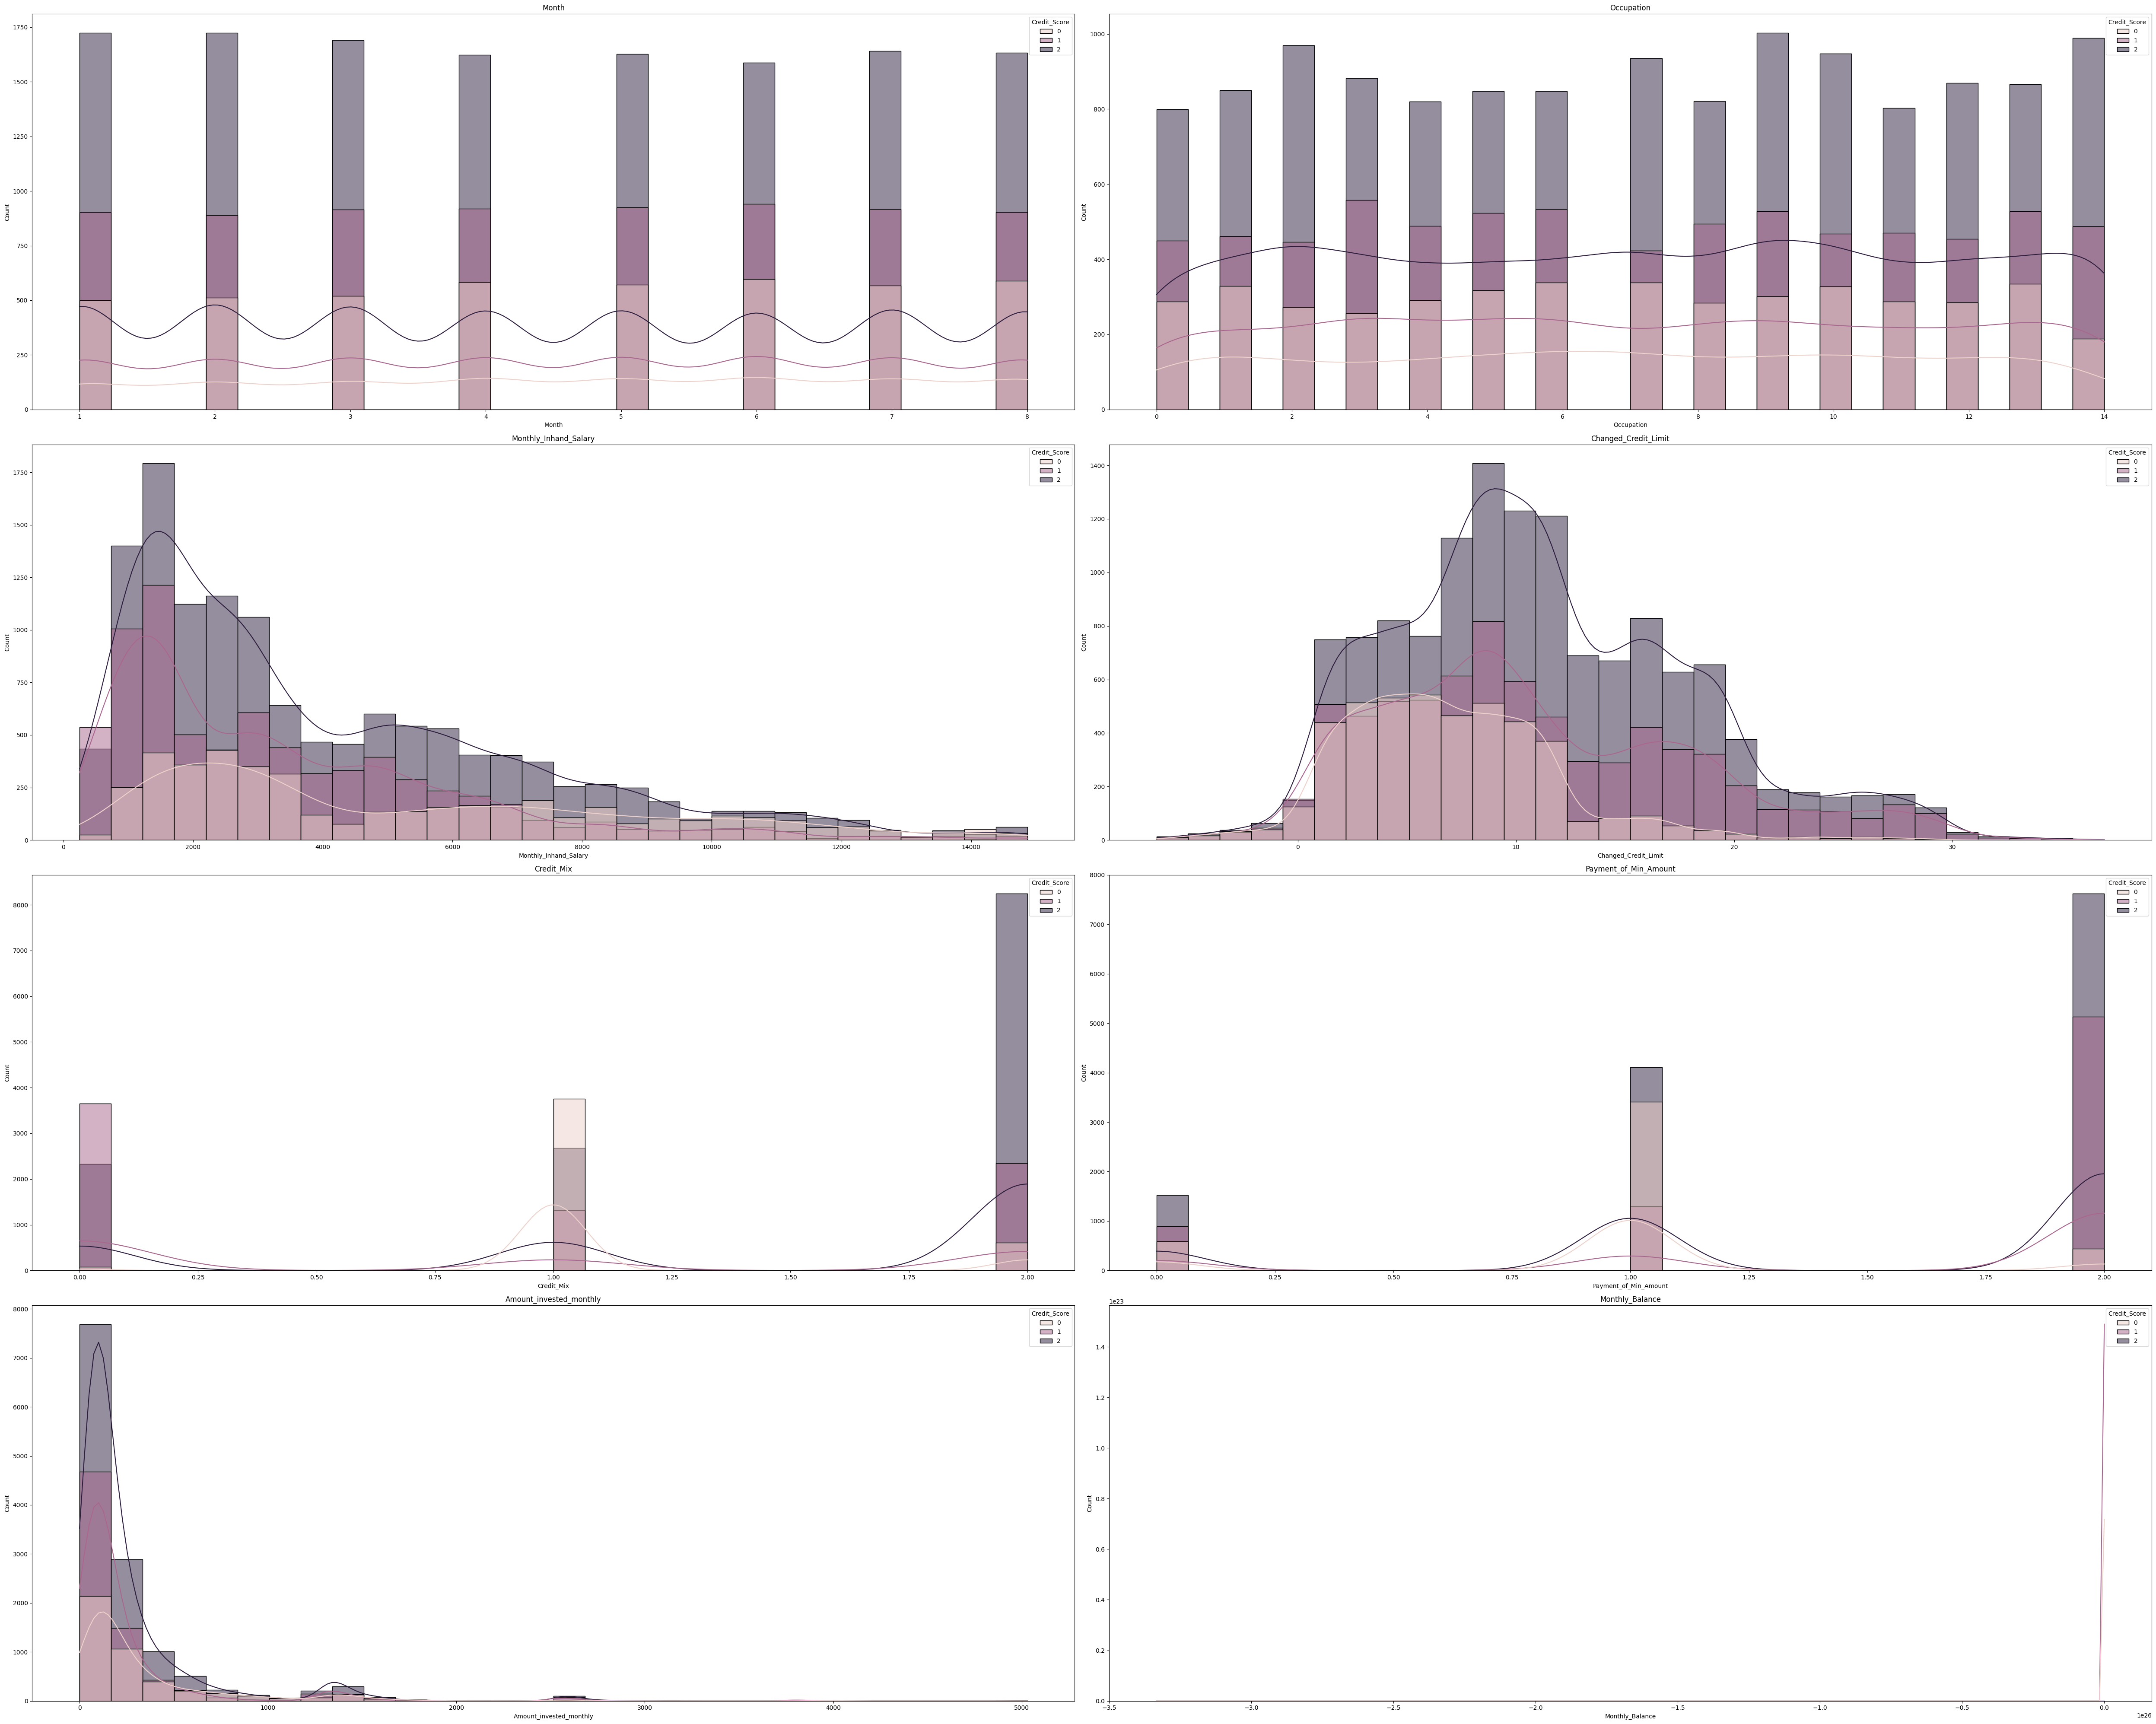

In [30]:
def show_histogram():
    show_columns = [
        "Month",
        "Occupation",
        "Monthly_Inhand_Salary",
        "Changed_Credit_Limit",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Amount_invested_monthly",
        "Monthly_Balance",
    ]

    num_rows = len(show_columns)
    num_cols = 2

    fig, axs = plt.subplots(num_rows // num_cols, num_cols, figsize=(50, 40))
    for i, item in enumerate(show_columns):
        row = i // num_cols
        col = i % num_cols
        sns.histplot(
            x=data[item],
            hue=data["Credit_Score"],
            data=data,
            bins=30,
            kde=True,
            ax=axs[row, col],
        )
        axs[row, col].set_title(item)
        # axs[row, col].tick_params(axis="both", which="major", labelsize=24)
    plt.tight_layout()
    plt.show()
    
show_histogram()

<h3>Balancing the data with oversampling</h3>

In [31]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

y = new_data["Credit_Score"]
X = new_data.drop("Credit_Score", axis=1)
X, y = sampler.fit_resample(X, y)

new_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

<Axes: ylabel='count'>

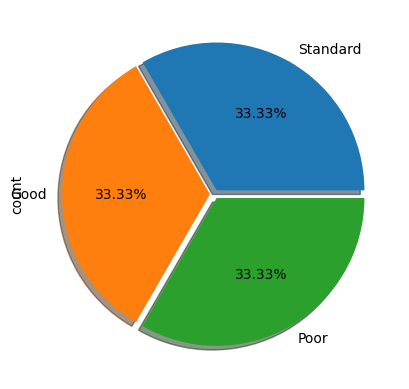

In [32]:
new_data["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Good", "Poor"],
)

In [33]:
new_data.describe()

Month           Age    Occupation  Annual_Income  \
count  33105.000000  33105.000000  33105.000000   3.310500e+04   
mean       4.545537     33.715300      7.041263   1.685074e+05   
std        2.282289     10.781957      4.276156   1.399195e+06   
min        1.000000     14.000000      0.000000   7.006520e+03   
25%        3.000000     25.000000      3.000000   1.950673e+04   
50%        5.000000     34.000000      7.000000   3.559316e+04   
75%        7.000000     42.000000     11.000000   6.785016e+04   
max        8.000000     56.000000     14.000000   2.418881e+07   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           33105.000000       33105.000000     33105.000000   
mean             3709.906378           5.198006         5.434436   
std              2736.130630           2.700385         2.142348   
min               250.197500           0.000000         0.000000   
25%              1561.250000           3.000000         4.000000   
50%              2868.609167           5.000000         5.000000   
75%              5267.627500           7.000000         7.000000   
max             14866.446667          10.000000        11.000000   

       Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count   33105.000000  33105.000000         33105.000000   
mean       13.974173      3.587645            20.639326   
std         9.097594      2.398495            15.078422   
min         1.000000      0.000000            -0.875000   
25%         6.000000      2.000000             9.000000   
50%        12.000000      3.000000            17.000000   
75%        20.000000      5.000000            28.000000   
max        34.000000      9.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            33105.000000          33105.000000          33105.000000   
mean                12.766229              9.740542              5.695665   
std                  6.503598              6.694095              3.940544   
min                 -3.000000             -6.310000              0.000000   
25%                  8.000000              4.740000              2.000000   
50%                 13.000000              8.740000              5.000000   
75%                 18.000000             13.510000              9.000000   
max                 29.750000             36.970000             17.125000   

         Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
count  33105.000000      33105.000000              33105.000000   
mean       1.125208       1410.906385                 31.988694   
std        0.772011       1158.319843                  5.020519   
min        0.000000          1.480000                 20.000000   
25%        1.000000        559.350000                 27.752592   
50%        1.000000       1154.460000                 31.981668   
75%        2.000000       1916.480000                 36.278868   
max        2.000000       4998.070000                 43.726885   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
count           33105.000000         33105.000000             33105.000000   
mean                1.354871          1425.222113               288.901264   
std                 0.689478          8342.788961               433.104921   
min                 0.000000             0.000000                 0.000000   
25%                 1.000000            30.821980                74.375770   
50%                 1.000000            67.236236               138.369489   
75%                 2.000000           161.224249               289.249402   
max                 2.000000         82256.000000              5029.942152   

       Payment_Behaviour  Monthly_Balance  Credit_Score  
count       33105.000000     33105.000000  33105.000000  
mean            2.605109       360.732089      1.000000  
std             1.473740       144.025357      0.816509  
min             0.000000         0.453456

<h4>Correlation map after balancing the data</h4>

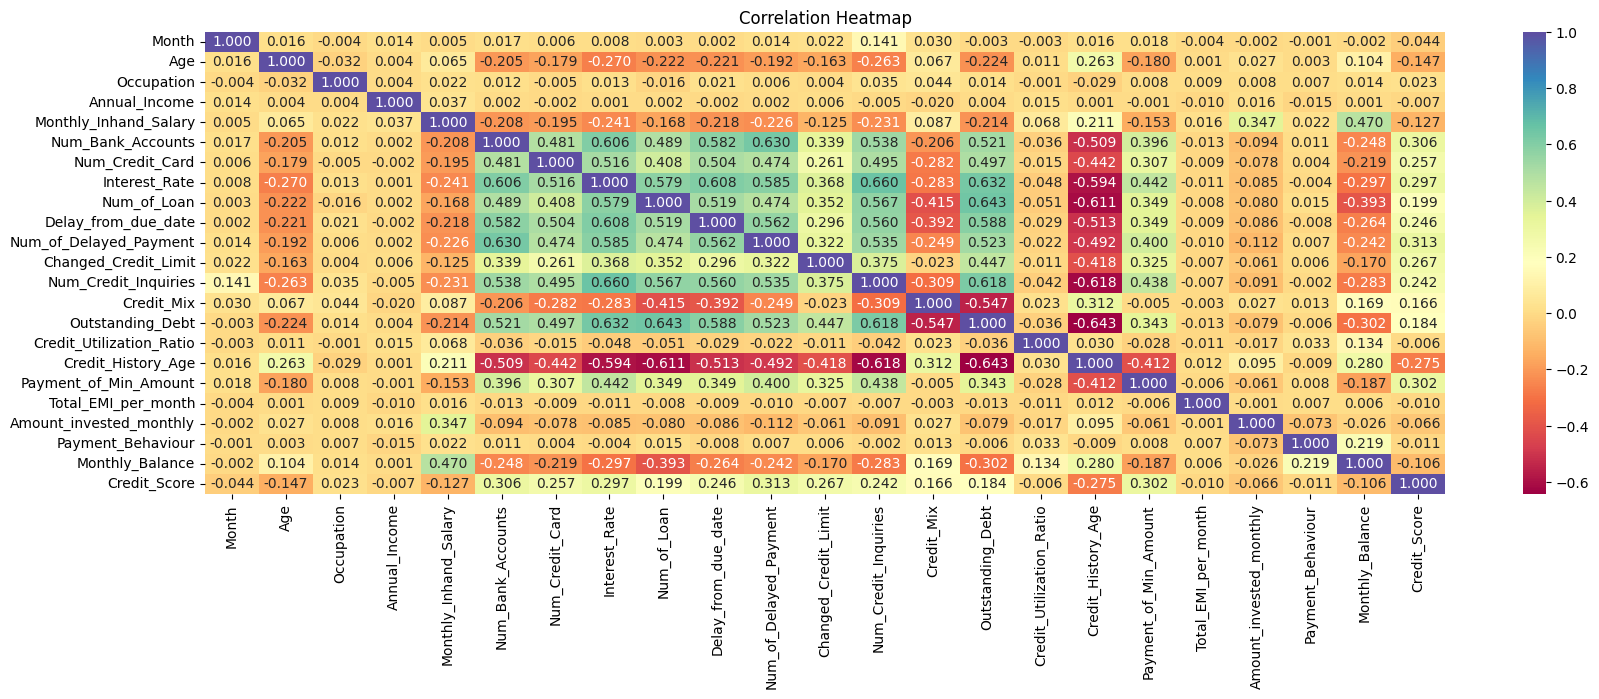

In [34]:
show_heat_map(new_data)

<h3>Feature Selection and Machine Learning Algorithms</h3>

<div>
  <div>Feature Selection Algorithms</div>
  <ul>
    <li>Lasso</li>
    <li>chi2</li>
    <li>MIC</li>
    <li>Ridge</li>
    <li>RFE</li>
    <li>PCA</li>
  </ul>
</div>


<div>
  <div>Machine Learning Algorithms</div>
  <ul>
    <li>Random Forest</li>
    <li>Decision Tree</li>
    <li>Gradient Boosting</li>
  </ul>
</div>


In [35]:
result_list = {"Lasso" : [], "chi2" : [],"MIC" : [],"Ridge" : [],"RFE" : [],"PCA" : [], "MaxVoting" : [], "Stacking" : []}

def calculate(y_test, y_pred, y_proba, y_bin, method_name, num_of_features, model_name):

    dictionary = {        
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1" : f1_score(y_test, y_pred, average='weighted'),
        "recall" : recall_score(y_test, y_pred, average='weighted'), 
        "precision" :  precision_score(y_test, y_pred, average='weighted'),
        "roc_auc" : roc_auc_score(y_test, y_proba, multi_class="ovr"),
        "number_of_features" : num_of_features, 
        "model_name" : model_name,
        "confusion_martrix" :  confusion_matrix(y_test, y_pred),
        "roc_curve" : None
    }

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(y_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    dictionary["roc_curve"] = [fpr, tpr, roc_auc]
    result_list[method_name].append(dictionary)


<h3>Scaling Data</h3>

In [36]:
def min_max_scale(X):
    scaler = MinMaxScaler()
    X_min_max = pd.DataFrame(scaler.fit_transform(X))
    return X_min_max

def standard_scaler(X):
    scaler = StandardScaler()
    X_standard = pd.DataFrame(scaler.fit_transform(X))
    return X_standard

In [37]:
X = new_data.drop("Credit_Score", axis=1)
X_standard = standard_scaler(X)
X_min_max = min_max_scale(X)
y = new_data["Credit_Score"]

In [38]:
def fit_model(X_selected, y,method_name ,model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])
    calculate(y_test, y_pred, y_proba, y_bin, method_name,X_selected.shape[1], model_name)

<h4>Lasso</h4>

In [39]:
def lasso(X,y):
    lasso = Lasso(alpha=0.042)
    lasso.fit(X, y)
    selected = X.columns[lasso.coef_ != 0]
    return X[selected]

In [40]:
X_selected = lasso(X_standard,y)

fit_model(X_selected,y,"Lasso",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
fit_model(X_selected,y,"Lasso",DecisionTreeClassifier(), "DecisionTreeClassifier")
fit_model(X_selected,y,"Lasso",GradientBoostingClassifier(), "GradientBoostingClassifier")


<h4>Chi2 and Mutual Info</h4>

In [41]:
def select_kbest(X, y, method, k):
    k_best = SelectKBest(score_func=method, k=k)
    selected = k_best.fit_transform(X, y)
    return selected

for i in range(15,X.shape[1]+1):
    fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
    fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",DecisionTreeClassifier(), "DecisionTreeClassifier")
    fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",GradientBoostingClassifier(), "GradientBoostingClassifier")
    fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
    fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",DecisionTreeClassifier(), "DecisionTreeClassifier")
    fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",GradientBoostingClassifier(), "GradientBoostingClassifier")

<h4>Ridge</h4>

In [42]:
def ridge(X, y, k):
    ridge = Ridge(alpha=1)
    ridge.fit(X, y)
    feature_importance = np.abs(ridge.coef_)
    selected_feature_indices = np.argsort(feature_importance)[::-1][:k]
    X_selected = X.iloc[:, selected_feature_indices]
    return X_selected

for i in range (15,X.shape[1]+1):
    fit_model(ridge(X_min_max,y,i), y,"Ridge",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
    fit_model(ridge(X_min_max,y,i), y,"Ridge",DecisionTreeClassifier(),"DecisionTreeClassifier")
    fit_model(ridge(X_min_max,y,i), y,"Ridge",GradientBoostingClassifier(),"GradientBoostingClassifier")


<h4>RFE</h4>

In [43]:
def RFE_feature_selection(X, y, model, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    rfe = RFE(model,n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = rfe.support_
    selected_columns = X_train.columns[selected_features]
    return  X_train[selected_columns], X_test[selected_columns], y_train,y_test


def RFE_predict(X,y,model,model_name,k):
    X_train, X_test, y_train, y_test = RFE_feature_selection(X,y,model,k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])
    calculate(y_test,y_pred,y_proba,y_bin,"RFE",X_train.shape[1],model_name)

for i in range (15,X.shape[1]+1):
    RFE_predict(X,y,RandomForestClassifier(n_jobs=-1),"RandomForestClassifier",i)
    RFE_predict(X,y,DecisionTreeClassifier(),"DecisionTreeClassifier",i)
    RFE_predict(X,y,GradientBoostingClassifier(),"GradientBoostingClassifier",i)

<h4>PCA</h4>

In [44]:
def PCA_feature_selection(X, k):
    pca = PCA(n_components = k)
    pca.fit(X)
    data = pca.transform(X)
    return data

for i in range(15,X.shape[1]+1):
    fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
    fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",DecisionTreeClassifier(),"DecisionTreeClassifier")
    fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",GradientBoostingClassifier(),"GradientBoostingClassifier")

In [45]:
models_data = []

for model_name, model_data in result_list.items():
    for j in range(len(model_data)): 
        model_item = model_data[j]
        model_entry = {
            'method_name' : model_name,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'roc_auc' : model_item["roc_auc"],
            'number_of_features': model_item["number_of_features"],
            'confusion_matrix' : model_item["confusion_martrix"],
            "roc_curve" : model_item["roc_curve"]
        }
        models_data.append(model_entry)

score_dataframe = pd.DataFrame(models_data)
best_method = score_dataframe[score_dataframe["accuracy"] == score_dataframe["accuracy"].max()]

In [46]:
score_dataframe.drop(["confusion_matrix", "roc_curve"], axis=1)

method_name                  model_name  accuracy        f1    recall  \
0         Lasso      RandomForestClassifier  0.911645  0.909778  0.911645   
1         Lasso      DecisionTreeClassifier  0.893370  0.891524  0.893370   
2         Lasso  GradientBoostingClassifier  0.735085  0.733229  0.735085   
3          chi2      RandomForestClassifier  0.912853  0.910609  0.912853   
4          chi2      DecisionTreeClassifier  0.880985  0.878584  0.880985   
..          ...                         ...       ...       ...       ...   
118         PCA      DecisionTreeClassifier  0.849116  0.845325  0.849116   
119         PCA  GradientBoostingClassifier  0.732518  0.729863  0.732518   
120         PCA      RandomForestClassifier  0.885063  0.882505  0.885063   
121         PCA      DecisionTreeClassifier  0.853043  0.849615  0.853043   
122         PCA  GradientBoostingClassifier  0.731158  0.727668  0.731158   

     precision   roc_auc  number_of_features  
0     0.912945  0.979562                  10  
1     0.893684  0.920315                  10  
2     0.734526  0.882413                  10  
3     0.914778  0.979041                  15  
4     0.880166  0.910546                  15  
..         ...       ...                 ...  
118   0.849440  0.886960                  21  
119   0.733006  0.881095                  21  
120   0.887314  0.978907                  22  
121   0.851911  0.889276                  22  
122   0.730352  0.881277                  22  

[123 rows x 8 columns]

In [47]:
best_method.drop(["confusion_matrix", "roc_curve"], axis=1)

method_name              model_name  accuracy        f1    recall  \
18        chi2  RandomForestClassifier  0.918894  0.916898  0.918894   

    precision   roc_auc  number_of_features  
18   0.921529  0.981832                  20

In [48]:
method_name = best_method["method_name"].to_string().split(" ")[-1]
number_of_features = int(best_method["number_of_features"].to_string().split(" ")[-1])

In [49]:
call_best_method = {
    "Lasso": lambda _, X=X_standard, y=y: lasso(X, y),
    "chi2": lambda k, X=X_min_max, y=y: select_kbest(X, y, chi2, k),
    "MIC": lambda k, X=X_min_max, y=y: select_kbest(X, y, mutual_info_classif, k),
    "Ridge": lambda k, X=X_standard, y=y: ridge(X, y, k),
    "RFE": lambda k, X=X_standard, y=y: RFE_feature_selection(X, y, DecisionTreeClassifier(), k),
    "PCA": lambda k, X=X_standard, y=y: PCA_feature_selection(X, k),
}

X_selected_features = call_best_method[method_name](number_of_features)

In [50]:
if type(X_selected_features) == tuple:
    X_train, X_test, y_train, y_test = X_selected_features
else:
    X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size= 0.2, random_state=42)


<h4>Models for max voting and stacking</h4>

In [51]:
models = [
    ("RandomForestClassifier", RandomForestClassifier(n_jobs=-1, n_estimators=100)),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier(n_jobs=-1, n_neighbors=1)),
    ("ExtraTreeClassifier", ExtraTreeClassifier()),
]

<h4>Max Voting</h4>

In [52]:
def max_voting():
    max_voting_model = VotingClassifier(models, voting='soft', n_jobs=-1)
    max_voting_model.fit(X_train, y_train)
    prediction = max_voting_model.predict(X_test)
    y_proba = max_voting_model.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])

    calculate(y_test, prediction, y_proba,y_bin,  "MaxVoting", number_of_features, "MaxVoting")

max_voting()

<h4>Stacking</h4>

In [53]:
def stacking():
    stacked = StackingClassifier(estimators=models, final_estimator=RandomForestClassifier(n_estimators=150), n_jobs=-1)
    stacked.fit(X_train, y_train)
    predictions = stacked.predict(X_test)
    y_proba = stacked.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=[0,1,2])

    calculate(y_test, predictions, y_proba, y_bin, "Stacking", number_of_features, "Stacking")

stacking()

In [54]:
def add_to_dataframe(model, dataframe):
    models_data = []

    for j in range(len(result_list[model])): 
        model_item = result_list[model][j]
        model_entry = {
            'method_name' : model,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'roc_auc' : model_item["roc_auc"],
            'number_of_features': model_item["number_of_features"],
            "confusion_matrix" : model_item["confusion_martrix"],
            "roc_curve" : model_item["roc_curve"]
        }
        models_data.append(model_entry)

    temp_df =  pd.DataFrame(models_data)
    dataframe = pd.concat([dataframe, temp_df], ignore_index=True)
    return dataframe

In [55]:
score_dataframe = add_to_dataframe("MaxVoting", score_dataframe)
score_dataframe = add_to_dataframe("Stacking", score_dataframe)

<h3>Visualizing the results</h3>

In [56]:
scores = score_dataframe.copy()
model_names = [
    "RandomForestClassifier",
    "DecisionTreeClassifier",
    "GradientBoostingClassifier",
]


def show_results(method_name,plt_type = sns.lineplot):
    metrics = ["f1", "precision", "recall", "roc_auc"]
    fig, axs = plt.subplots(1, len(model_names), figsize=(20, 5))

    for i, item in enumerate(model_names):
        model_data = scores[
            (scores["method_name"] == method_name) & (scores["model_name"] == item)
        ]
        for metric in metrics:
            plt_type(x="number_of_features", y=metric, label = metric ,data=model_data,ax=axs[i])

        ax2 = axs[i].twinx()
        plt_type(x="number_of_features", y="accuracy", label = "accuracy",data=model_data, ax=ax2, linestyle="--",color="purple")
        axs[i].set_title(item)

    fig.suptitle(method_name, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

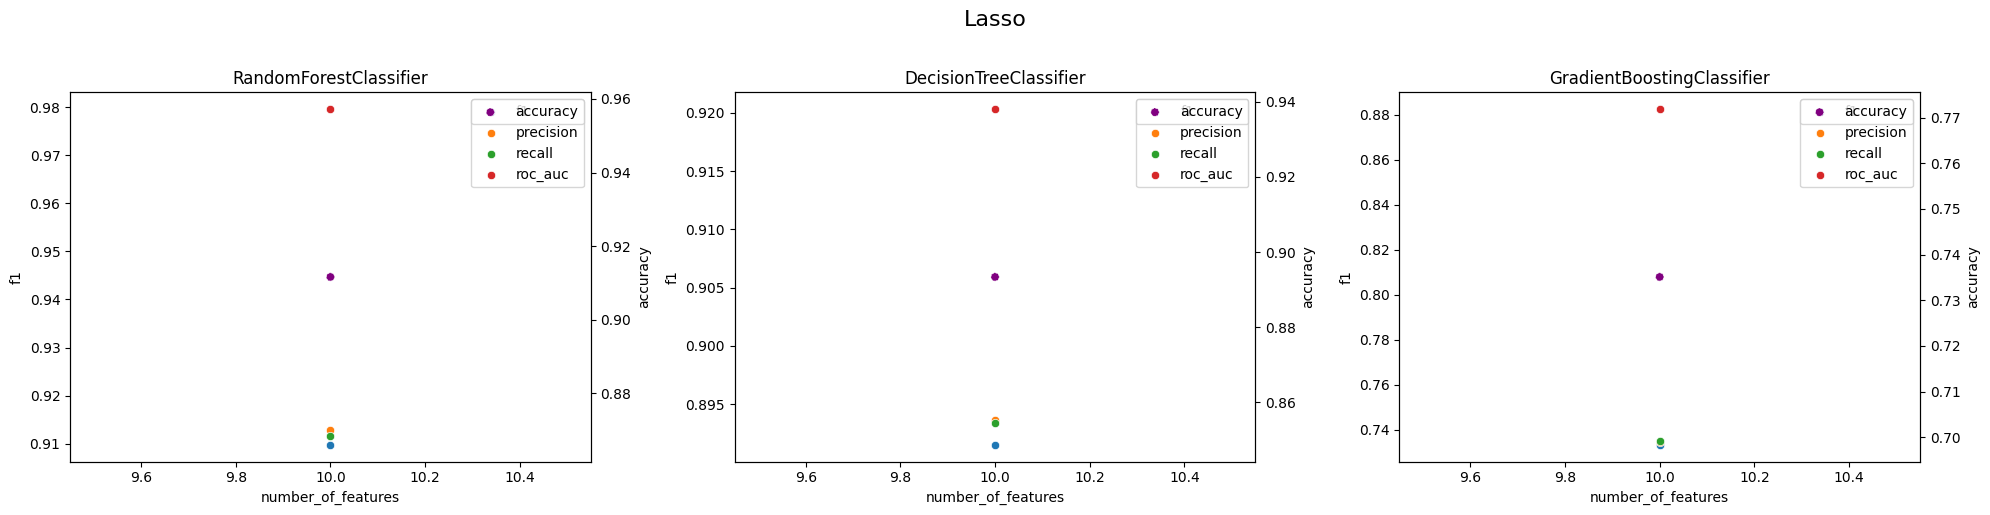

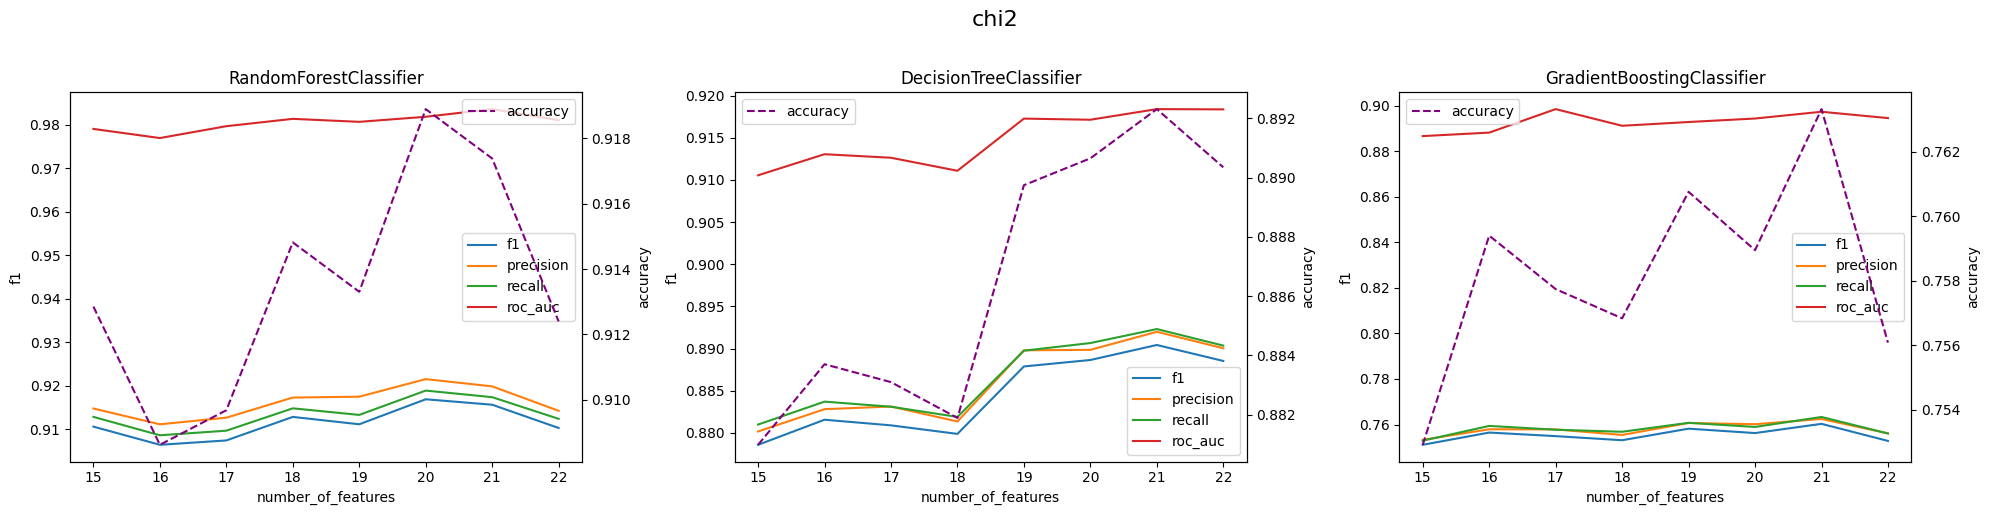

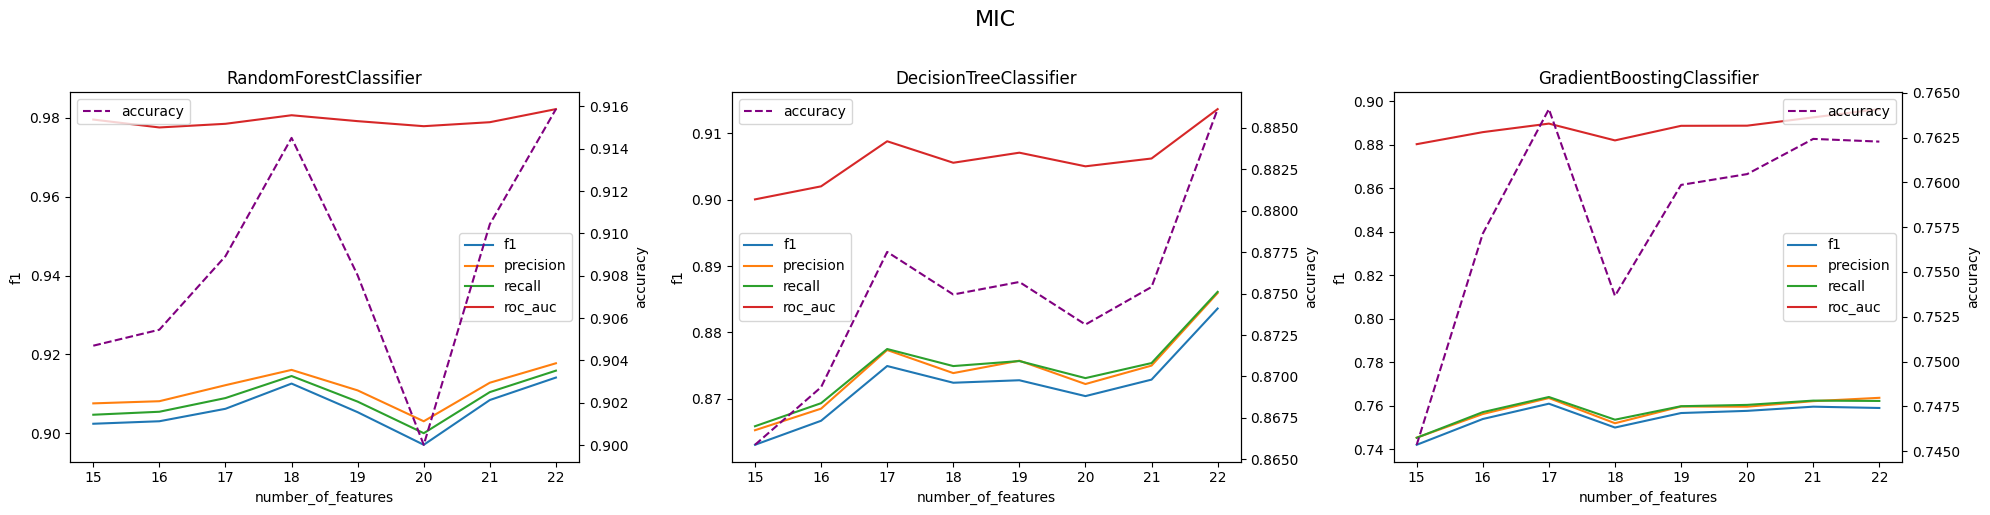

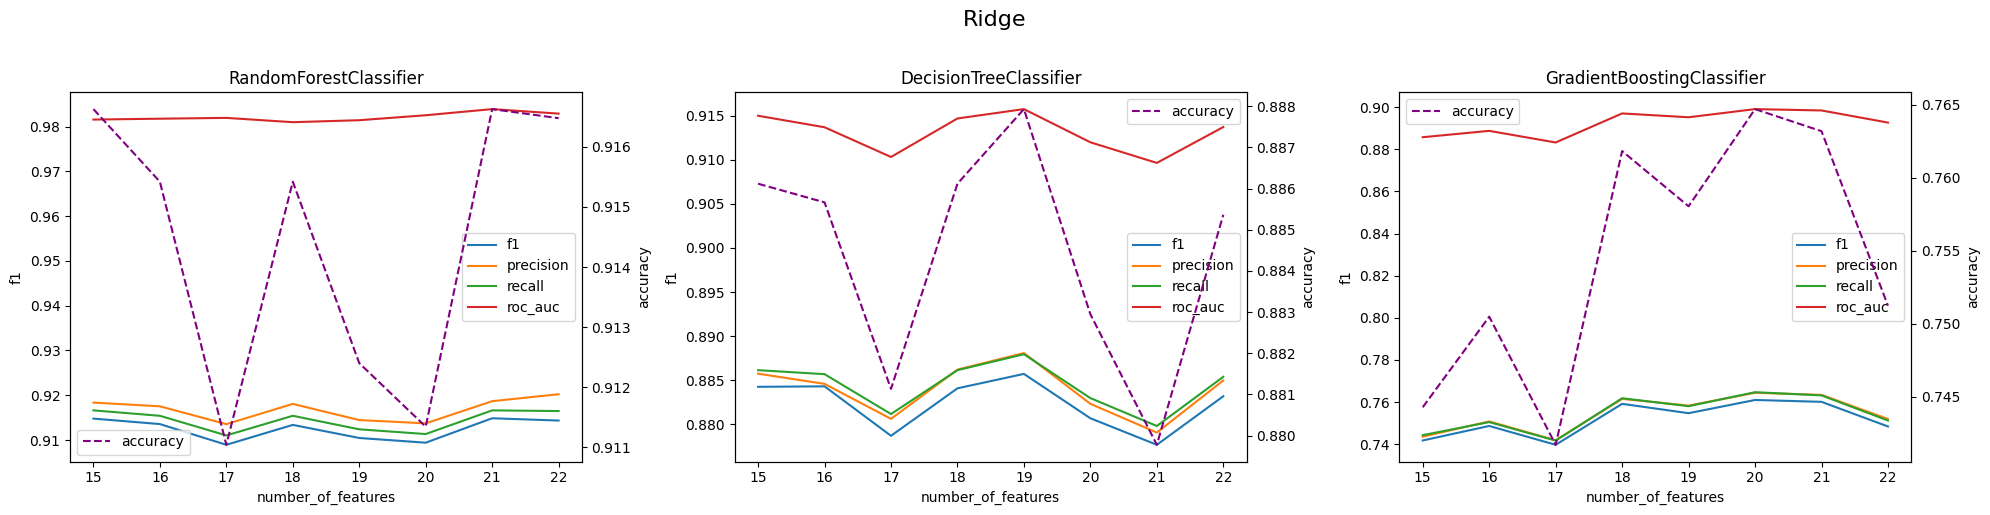

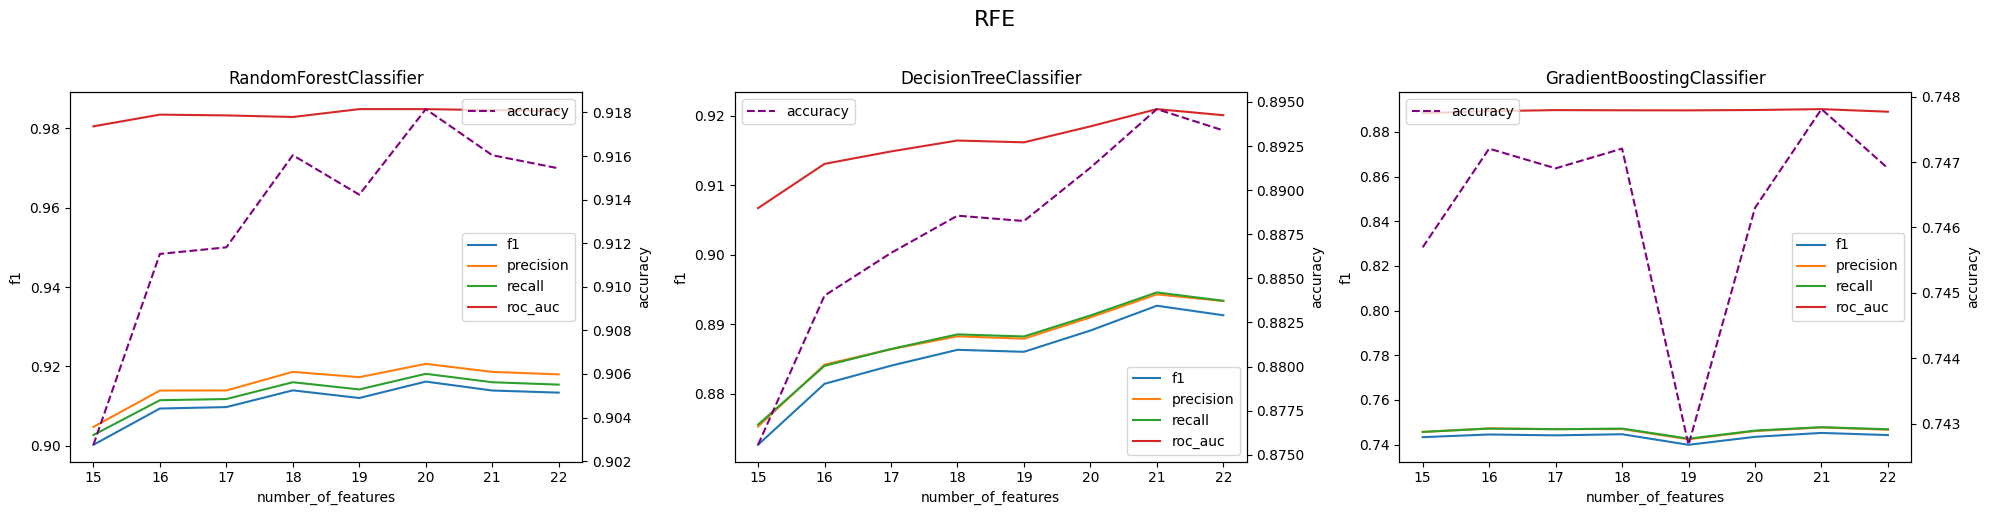

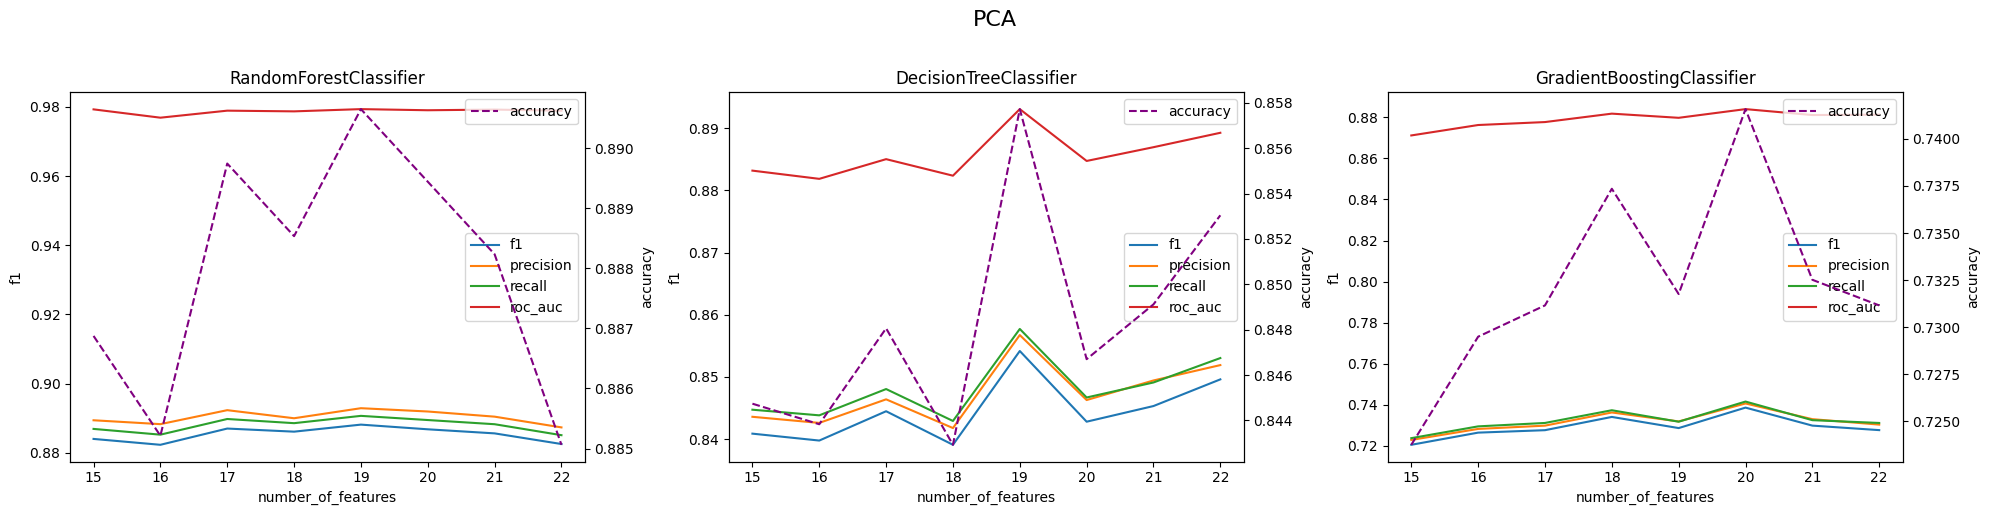

In [57]:
show_results("Lasso",plt_type=sns.scatterplot)
show_results("chi2")
show_results("MIC")
show_results("Ridge")
show_results("RFE")
show_results("PCA")

In [58]:
def calculate_best_scores():
    best_scores = {"Lasso": None, "chi2": None, "MIC": None, "Ridge": None, "RFE": None, "PCA": None, "MaxVoting": None, "Stacking": None}
    
    for i, row in score_dataframe.iterrows():
        current_best = best_scores[row["method_name"]]
        
        if current_best is None or row["accuracy"] > current_best["accuracy"]:
            best_scores[row["method_name"]] = row.to_dict()

    return best_scores

best_scores = calculate_best_scores()

In [59]:
best_scores_df = pd.DataFrame(list(best_scores.values()))
best_scores_df.drop(["confusion_matrix", "roc_curve"], axis=1)

method_name              model_name  accuracy        f1    recall  \
0       Lasso  RandomForestClassifier  0.911645  0.909778  0.911645   
1        chi2  RandomForestClassifier  0.918894  0.916898  0.918894   
2         MIC  RandomForestClassifier  0.915874  0.914122  0.915874   
3       Ridge  RandomForestClassifier  0.916629  0.914795  0.916629   
4         RFE  RandomForestClassifier  0.918152  0.916198  0.918152   
5         PCA  RandomForestClassifier  0.890651  0.888118  0.890651   
6   MaxVoting               MaxVoting  0.913004  0.911623  0.913004   
7    Stacking                Stacking  0.918290  0.917384  0.918290   

   precision   roc_auc  number_of_features  
0   0.912945  0.979562                  10  
1   0.921529  0.981832                  20  
2   0.917746  0.982190                  22  
3   0.918365  0.981552                  15  
4   0.920661  0.984780                  20  
5   0.892867  0.979371                  19  
6   0.913290  0.974452                  20  
7   0.918174  0.981661                  20

In [60]:
best_scores_df = best_scores_df.sort_values(by='accuracy', ascending=False)

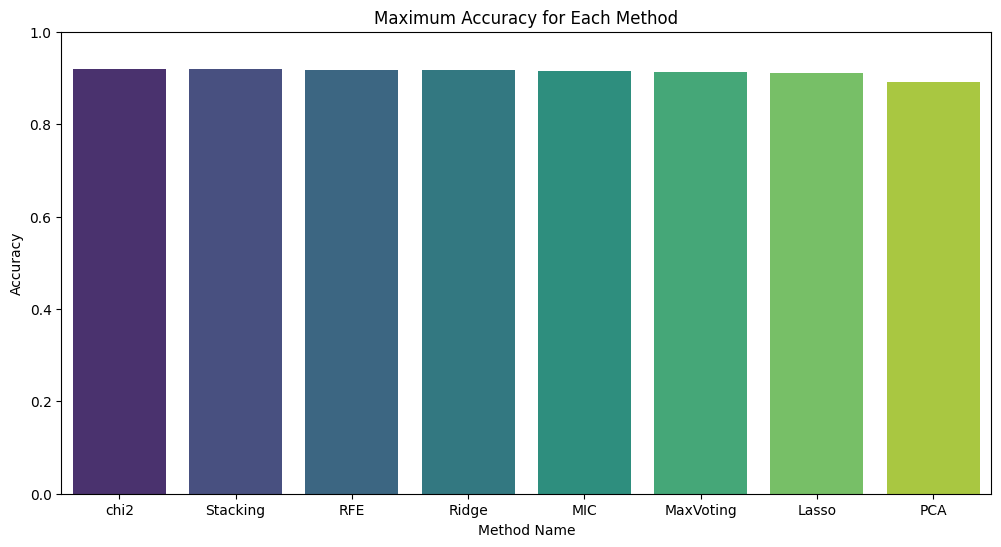

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='method_name', y='accuracy', data=best_scores_df, palette='viridis')
plt.title('Maximum Accuracy for Each Method')
plt.xlabel('Method Name')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

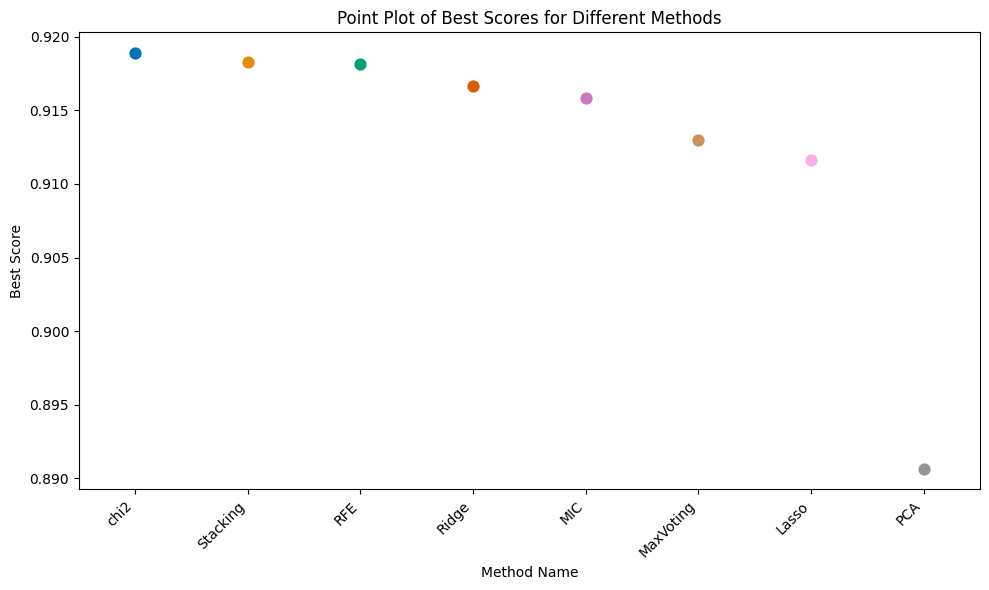

In [62]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='method_name', y='accuracy', data=best_scores_df, palette="colorblind")
plt.xlabel('Method Name')
plt.ylabel('Best Score')
plt.title('Point Plot of Best Scores for Different Methods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


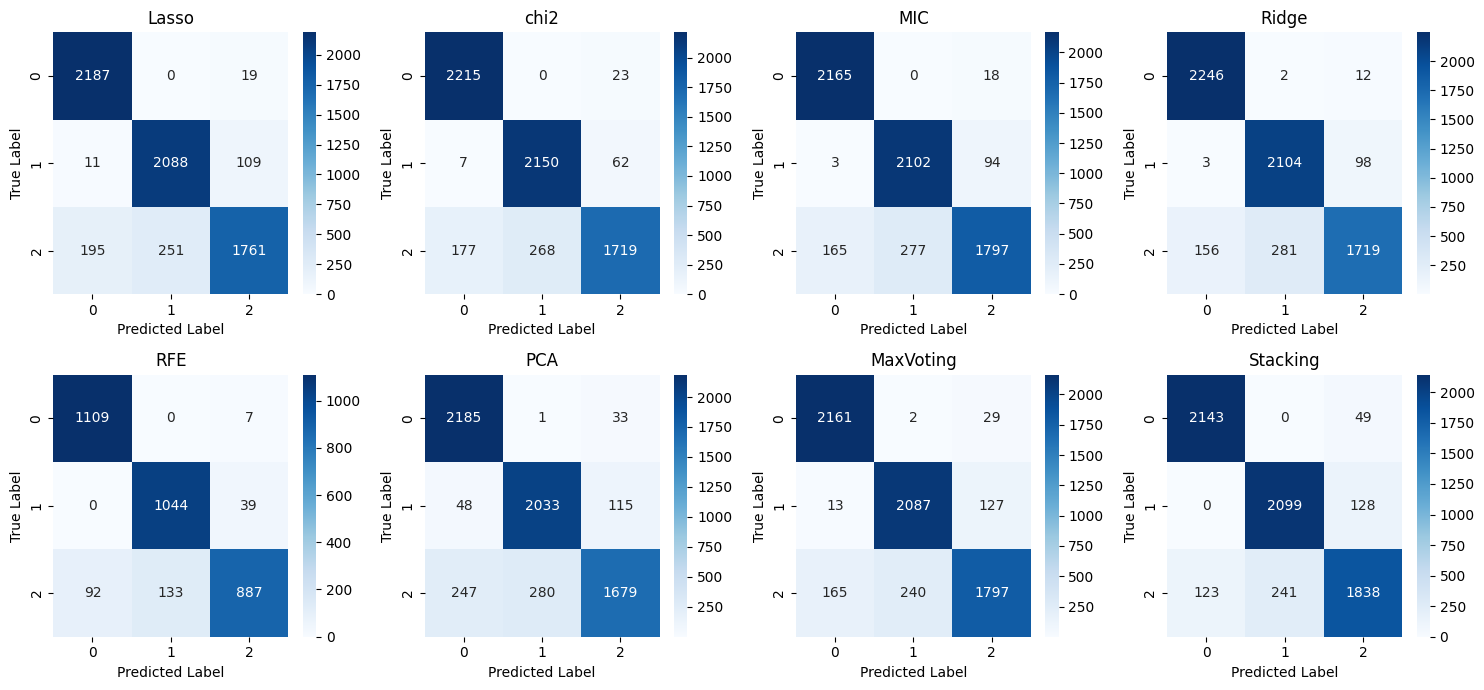

In [63]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = axes.flatten()
for i in range(len(best_scores_df)):
    sns.heatmap(best_scores_df["confusion_matrix"][i], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(best_scores_df['method_name'][i])
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
plt.tight_layout()

In [64]:
X = data.drop("Credit_Score", axis=1)
y = data["Credit_Score"]

def calculate_score_with_outliers(model):
    if method_name == "chi2" or method_name == "MIC":
        selected = call_best_method[method_name](number_of_features,X=min_max_scale(X),y=y)
    else:
        selected = call_best_method[method_name](number_of_features,X=standard_scaler(X),y=y)

    if type(selected) == tuple:
        X_train, X_test, y_train, y_test = selected
    else:
        X_train, X_test, y_train, y_test = train_test_split(selected, y, test_size= 0.2, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

outlier_score = calculate_score_with_outliers(RandomForestClassifier())
best_accuracy = best_scores_df.iloc[0]["accuracy"]

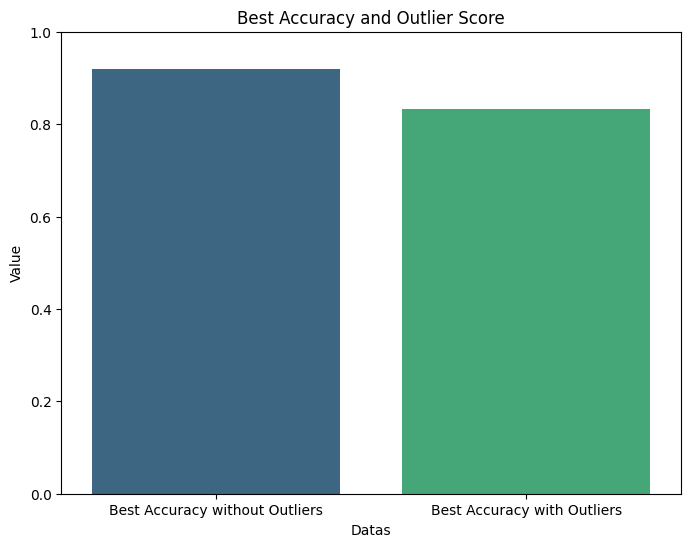

In [65]:
data = {
    'name': ['Best Accuracy without Outliers', 'Best Accuracy with Outliers'],
    'value': [best_accuracy, outlier_score]
}

df_metrics = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
colors = sns.color_palette("viridis", len(df_metrics['name']))
sns.barplot(x='name', y='value', data=df_metrics, palette=colors)
plt.title('Best Accuracy and Outlier Score')
plt.ylabel('Value')
plt.xlabel('Datas')
plt.ylim(0, 1)
plt.show()

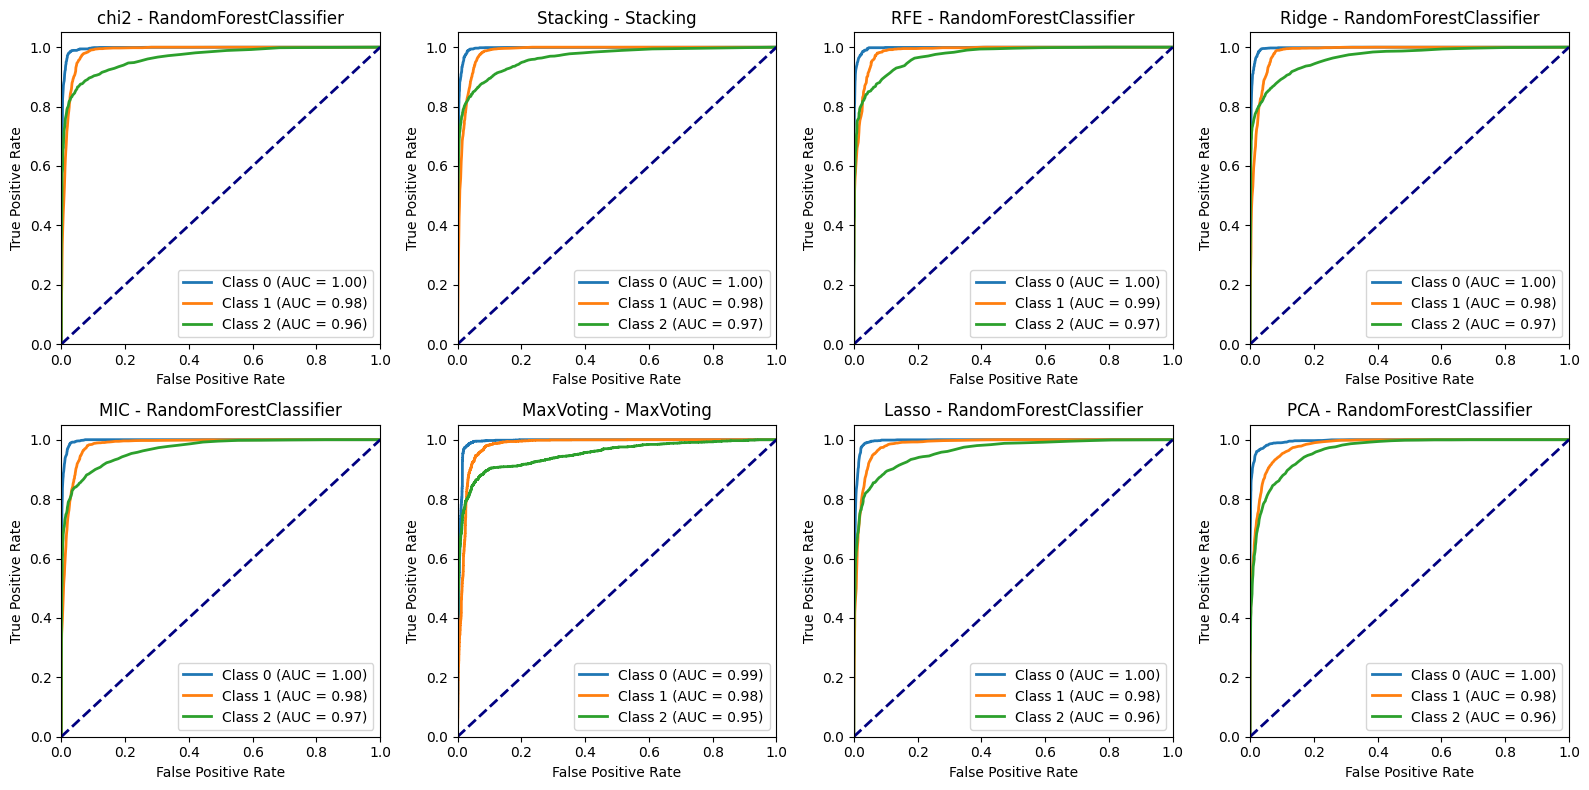

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for index, (i, row) in enumerate(best_scores_df.iterrows()):
    fpr = row["roc_curve"][0]
    tpr = row["roc_curve"][1]
    roc_auc = row["roc_curve"][2]

    row_index = index // 4
    col_index = index % 4
    
    for j in range(3):
        axes[row_index, col_index].plot(fpr[j], tpr[j], lw=2, label=f'Class {j} (AUC = {roc_auc[j]:.2f})')

    axes[row_index, col_index].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[row_index, col_index].set_xlim([0.0, 1.0])
    axes[row_index, col_index].set_ylim([0.0, 1.05])
    axes[row_index, col_index].set_xlabel('False Positive Rate')
    axes[row_index, col_index].set_ylabel('True Positive Rate')
    axes[row_index, col_index].set_title(f'{row["method_name"]} - {row["model_name"]}')
    axes[row_index, col_index].legend(loc="lower right")

plt.tight_layout()
plt.show()